In [7]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv("D:/GL/Total DS Codes2/Pred Model/Assignment Project/Final Files/Holiday_Package.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print("Top 5 rows",data.head())

Top 5 rows   Holliday_Package  Salary  age  educ  no_young_children  no_older_children  \
0               no   48412   30     8                  1                  1   
1              yes   37207   45     8                  0                  1   
2               no   58022   46     9                  0                  0   
3               no   66503   31    11                  2                  0   
4               no   66734   44    12                  0                  2   

  foreign  
0      no  
1      no  
2      no  
3      no  
4      no  


In [3]:
print(data.isna().sum())
print(data.isnull().sum())
cust_data=data.drop(['Holliday_Package','foreign'] , axis=1)

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64


In [4]:
        print("shape\n",cust_data.shape) # see the shape of the cust_data
        print("Info\n",cust_data.info())
        print("Mean\n",cust_data.mean())
        print("Mode\n",cust_data.mode())
        print("median\n",cust_data.median())
        print("cust_data_quantile(25%):\n",cust_data.quantile(q=0.25))
        print("cust_data_quantile(50%):\n",cust_data.quantile(q=0.50))
        print("cust_data_quantile(75%):\n",cust_data.quantile(q=0.75))
        print("describe\n",cust_data.describe())
#         print("IQR"+colname+"\n",cust_data[colname2].quantile(0.75) - cust_data[colname2].quantile(0.25))
        print("IQR\n",cust_data.quantile(0.75) - cust_data.quantile(0.25))
        Q1 = cust_data.quantile(0.25)
        Q3 = cust_data.quantile(0.75)
        IQR = Q3 - Q1
        print("Outlier sum\n",((cust_data < (Q1 - 1.5 * IQR)) | (cust_data > (Q3 + 1.5 * IQR))).sum())
        print("Range\n",cust_data.max() - cust_data.min())
        print("variance\n",cust_data.var())
        print("std\n",cust_data.std())
        print("cov\n",cust_data.cov())
        print("corr\n",cust_data.corr())
        print("skew\n",cust_data.skew())
        print("kurt\n",cust_data.kurt())

shape
 (872, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 5 columns):
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
dtypes: int64(5)
memory usage: 34.1 KB
Info
 None
Mean
 Salary               47729.172018
age                     39.955275
educ                     9.307339
no_young_children        0.311927
no_older_children        0.982798
dtype: float64
Mode
    Salary   age  educ  no_young_children  no_older_children
0   32197  44.0   8.0                0.0                0.0
1   33357   NaN   NaN                NaN                NaN
2   35341   NaN   NaN                NaN                NaN
3   36976   NaN   NaN                NaN                NaN
4   39460   NaN   NaN                NaN                NaN
5   40270   NaN   NaN                NaN                NaN
6   44280   N

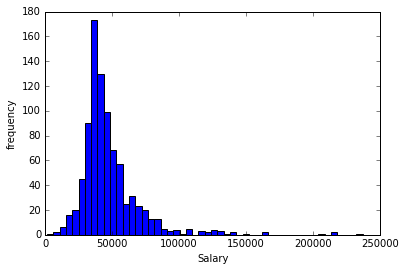

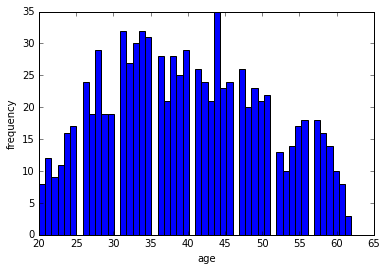

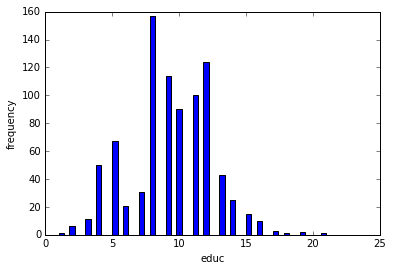

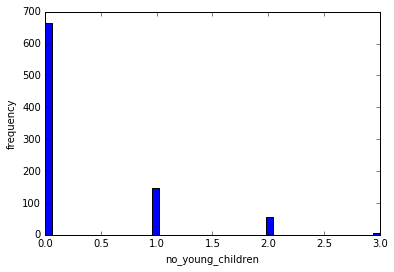

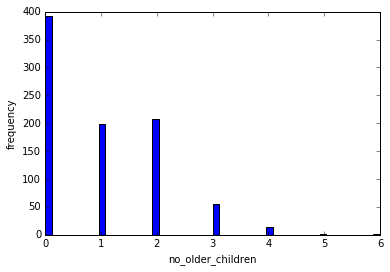

In [5]:
def histplot(data):
        colnames=list(data.columns.values)
        for i in range(0,5):
            plt.hist(data.iloc[:,i], bins=50)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
histplot(cust_data)

In [6]:
def valcount(data,colname):
    print("value count {} freqrange {}".format(colname,data[colname].value_counts(normalize=True)))

valcount(data,'Holliday_Package')
valcount(data,'foreign')

value count Holliday_Package freqrange no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64
value count foreign freqrange no     0.752294
yes    0.247706
Name: foreign, dtype: float64


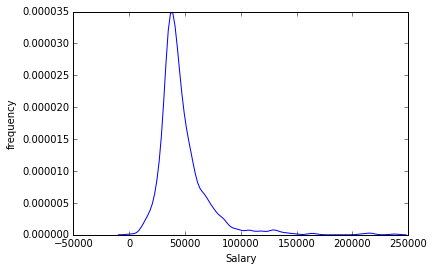

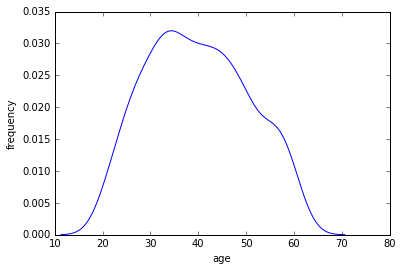

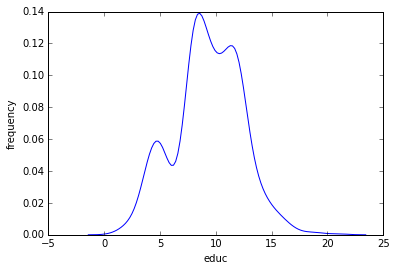

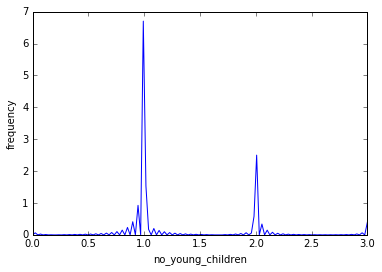

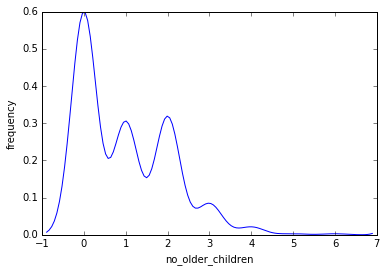

In [7]:
def distplot(data):
        colnames=list(data.columns.values)
        for i in range(0,5):
            sns.distplot(data.iloc[:,i], hist=False)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
distplot(cust_data)


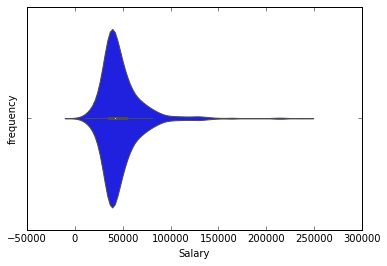

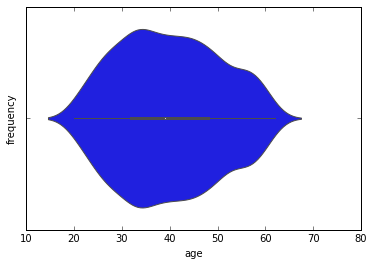

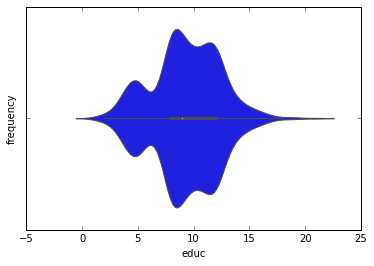

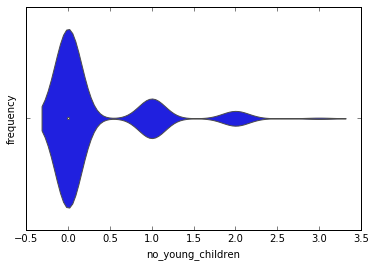

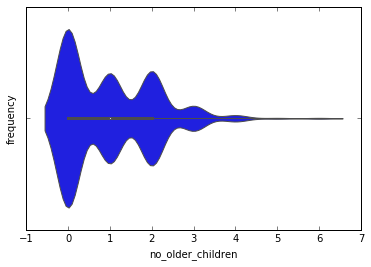

In [8]:
def violinplot(data):
        colnames=list(data.columns.values)
        for i in range(0,5):
            sns.violinplot(data.iloc[:,i], hist=False)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
violinplot(cust_data)

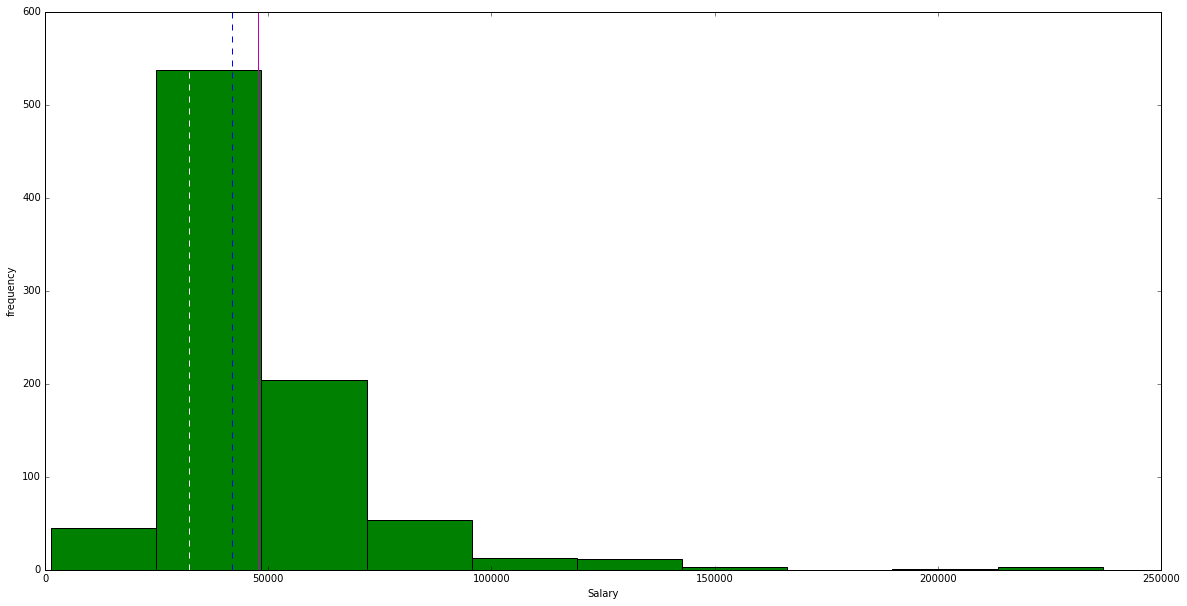

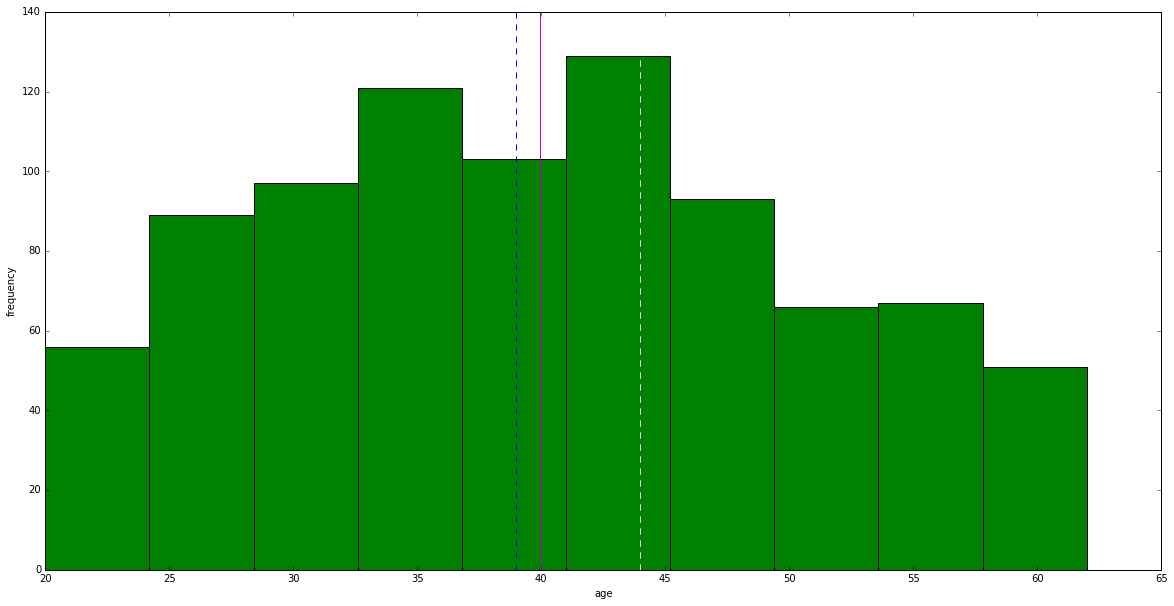

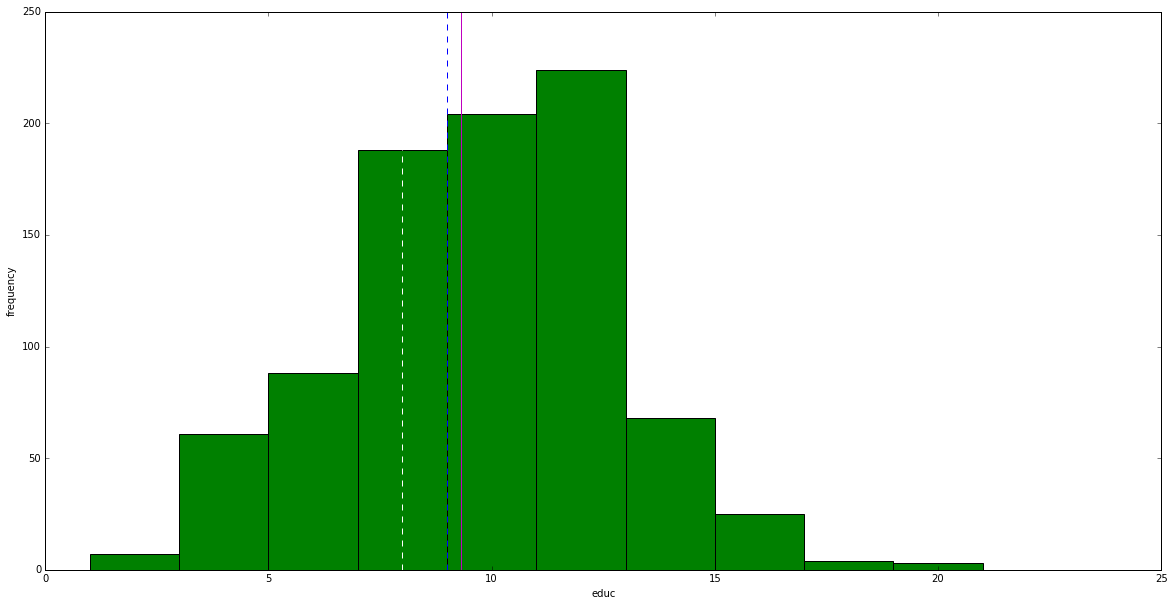

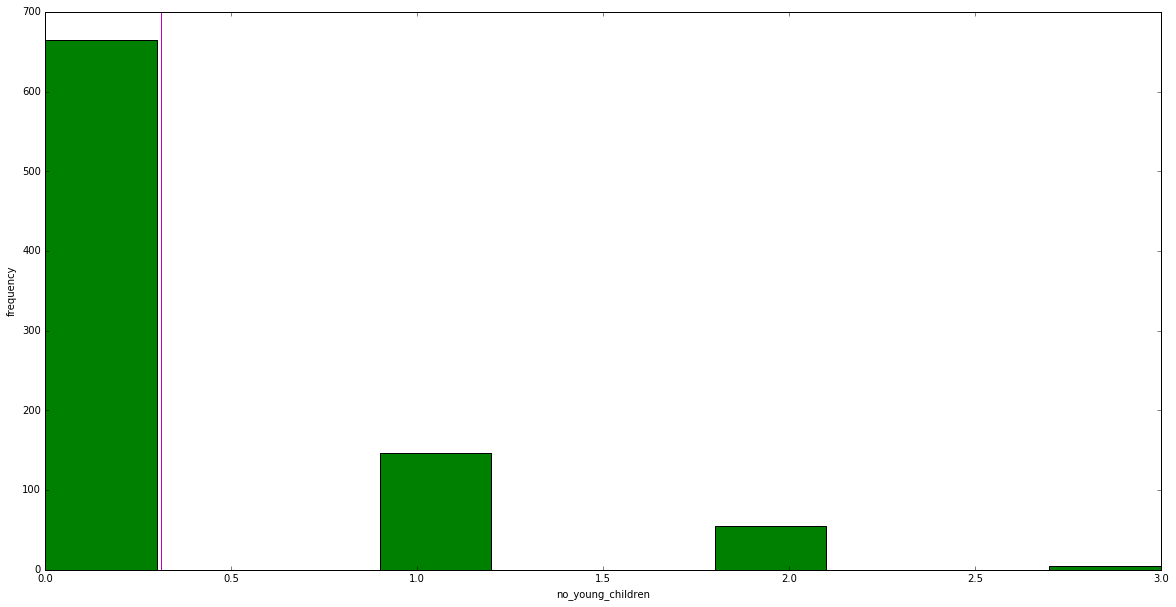

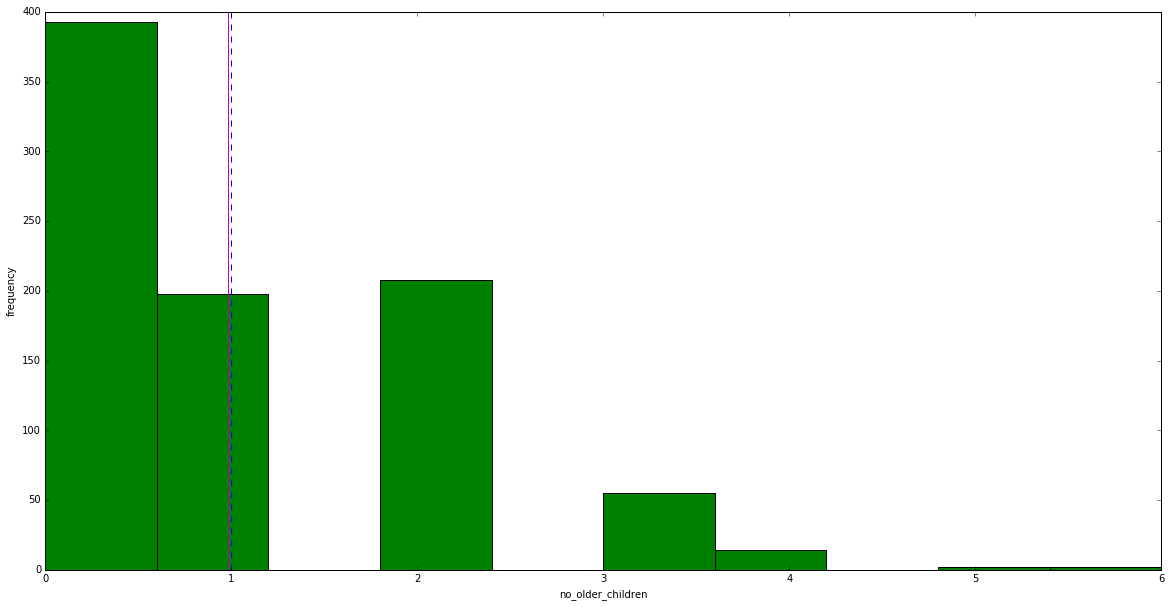

In [9]:
def closelookplot(data):
        colnames=list(data.columns.values)
        for i in range(0,5):
            plt.figure(figsize=(20,10)) # makes the plot wider
            plt.hist(data.iloc[:,i], color='g') # plots a simple histogram
            plt.axvline(data.iloc[:,i].mean(), color='m', linewidth=1)
            plt.axvline(data.iloc[:,i].median(), color='b', linestyle='dashed', linewidth=1)
            plt.axvline(data.iloc[:,i].mode()[0], color='w', linestyle='dashed', linewidth=1)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
closelookplot(cust_data)

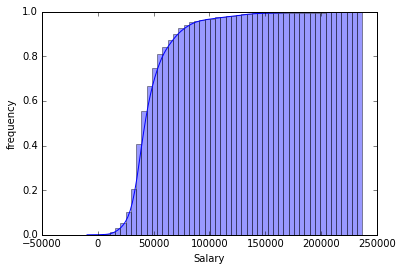

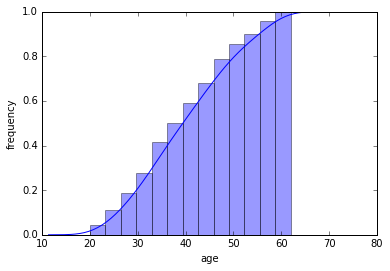

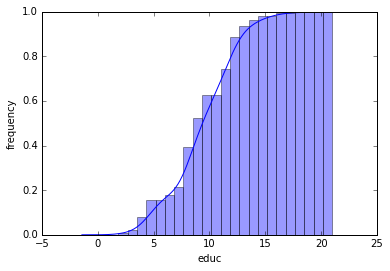

C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\sandbox\nonparametric\kernels.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  w = 1. / (h * n) * np.sum(self((xs-x)/h), axis=0)
C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\sandbox\nonparametric\kernels.py:204: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / (h * n) * np.sum(self((xs-x)/h), axis=0)
C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\sandbox\nonparametric\kernels.py:204: RuntimeWarning: invalid value encountered in multiply
  w = 1. / (h * n) * np.sum(self((xs-x)/h), axis=0)
C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:180: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  under

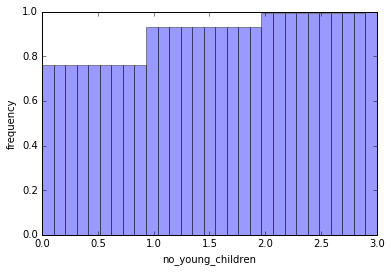

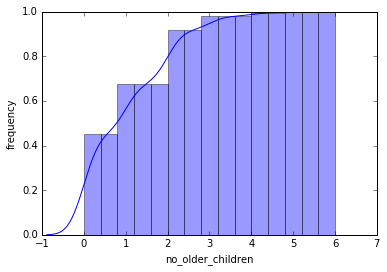

In [10]:
def cumuplot(data):
        colnames=list(data.columns.values)
        for i in range(0,5):
            sns.distplot(data.iloc[:,i], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
cumuplot(cust_data)

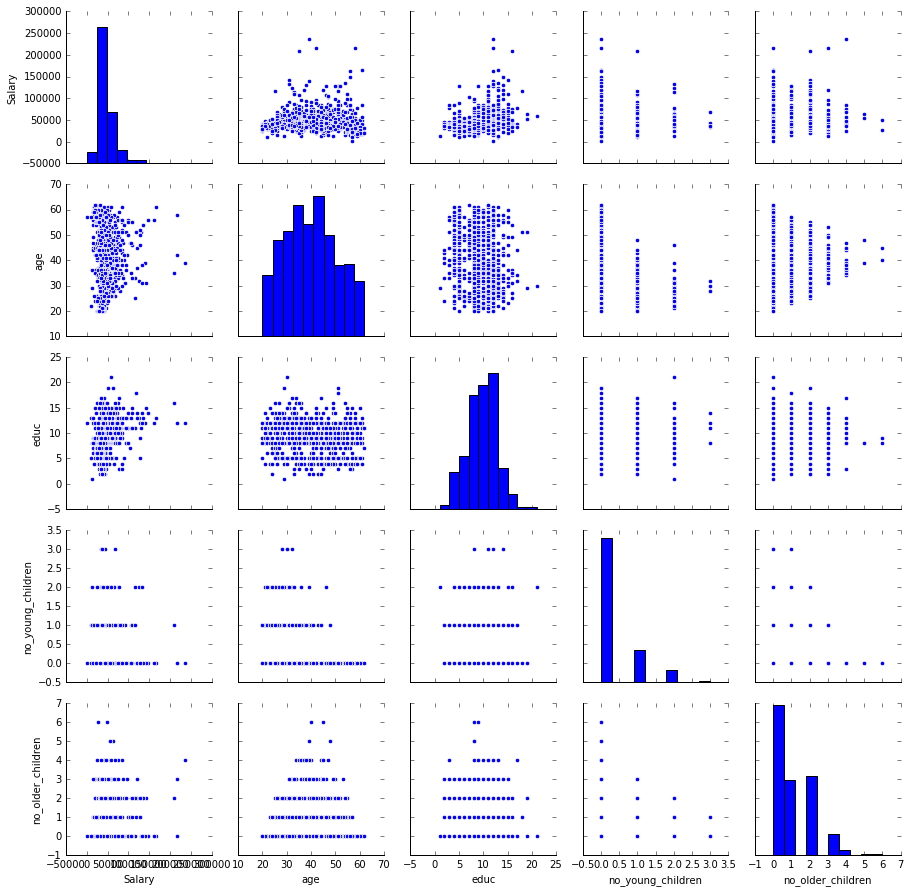

In [11]:
sns.pairplot(data)
plt.show()

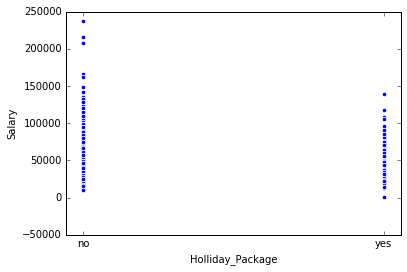

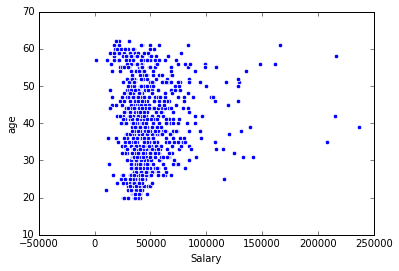

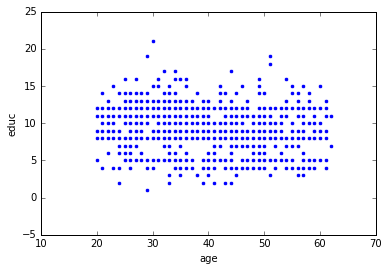

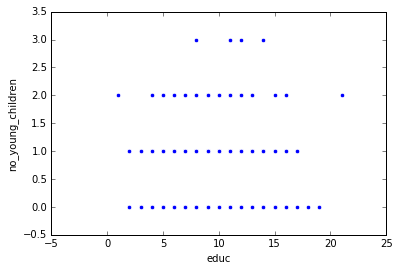

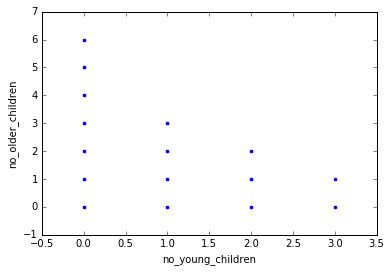

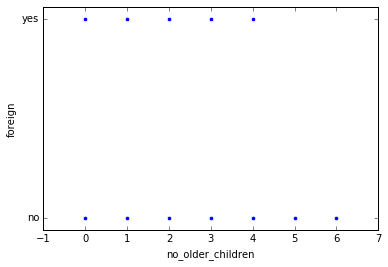

In [12]:
def multiscatplot(data):
        colnames=list(data.columns.values)
        for i in range(0,6):
            sns.scatterplot(data.iloc[:,i], data.iloc[:,i+1]) 
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
multiscatplot(data)

                     Salary       age      educ  no_young_children  \
Salary             1.000000  0.071709  0.326540          -0.029664   
age                0.071709  1.000000 -0.149294          -0.519093   
educ               0.326540 -0.149294  1.000000           0.098350   
no_young_children -0.029664 -0.519093  0.098350           1.000000   
no_older_children  0.113772 -0.116205 -0.036321          -0.238428   

                   no_older_children  
Salary                      0.113772  
age                        -0.116205  
educ                       -0.036321  
no_young_children          -0.238428  
no_older_children           1.000000  


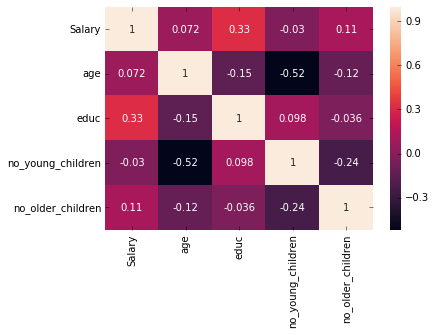

In [13]:
print(data.corr())
sns.heatmap(data.corr(), annot=True)

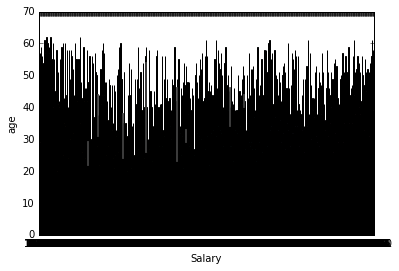

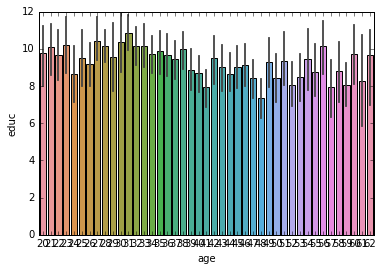

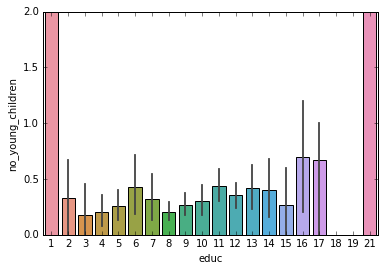

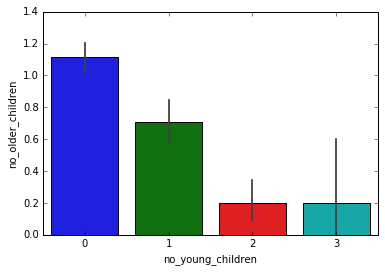

In [14]:
def barplot(data):
        colnames=list(data.columns.values)
        for i in range(0,4):
            sns.barplot(x=colnames[i], y=colnames[i+1], data=data)
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
barplot(cust_data)

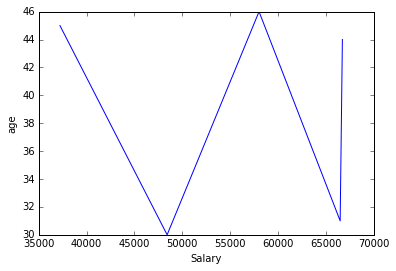

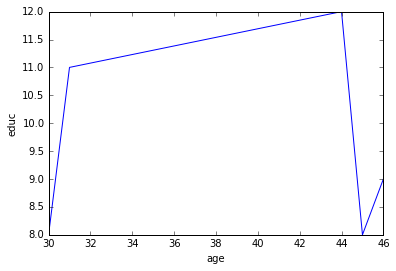

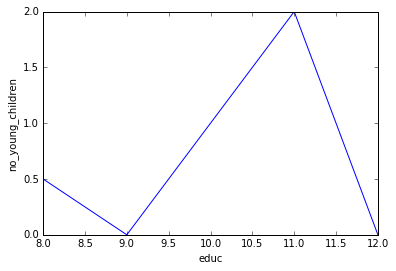

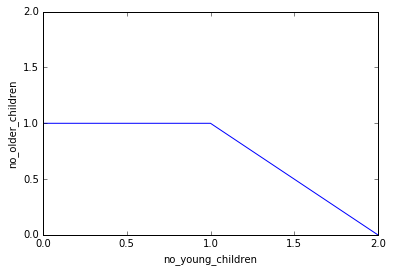

In [15]:
def lineplot(data):
        colnames=list(data.columns.values)
        for i in range(0,4):
            sns.lineplot(x=colnames[i], y=colnames[i+1], data=data.head())
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
lineplot(cust_data)

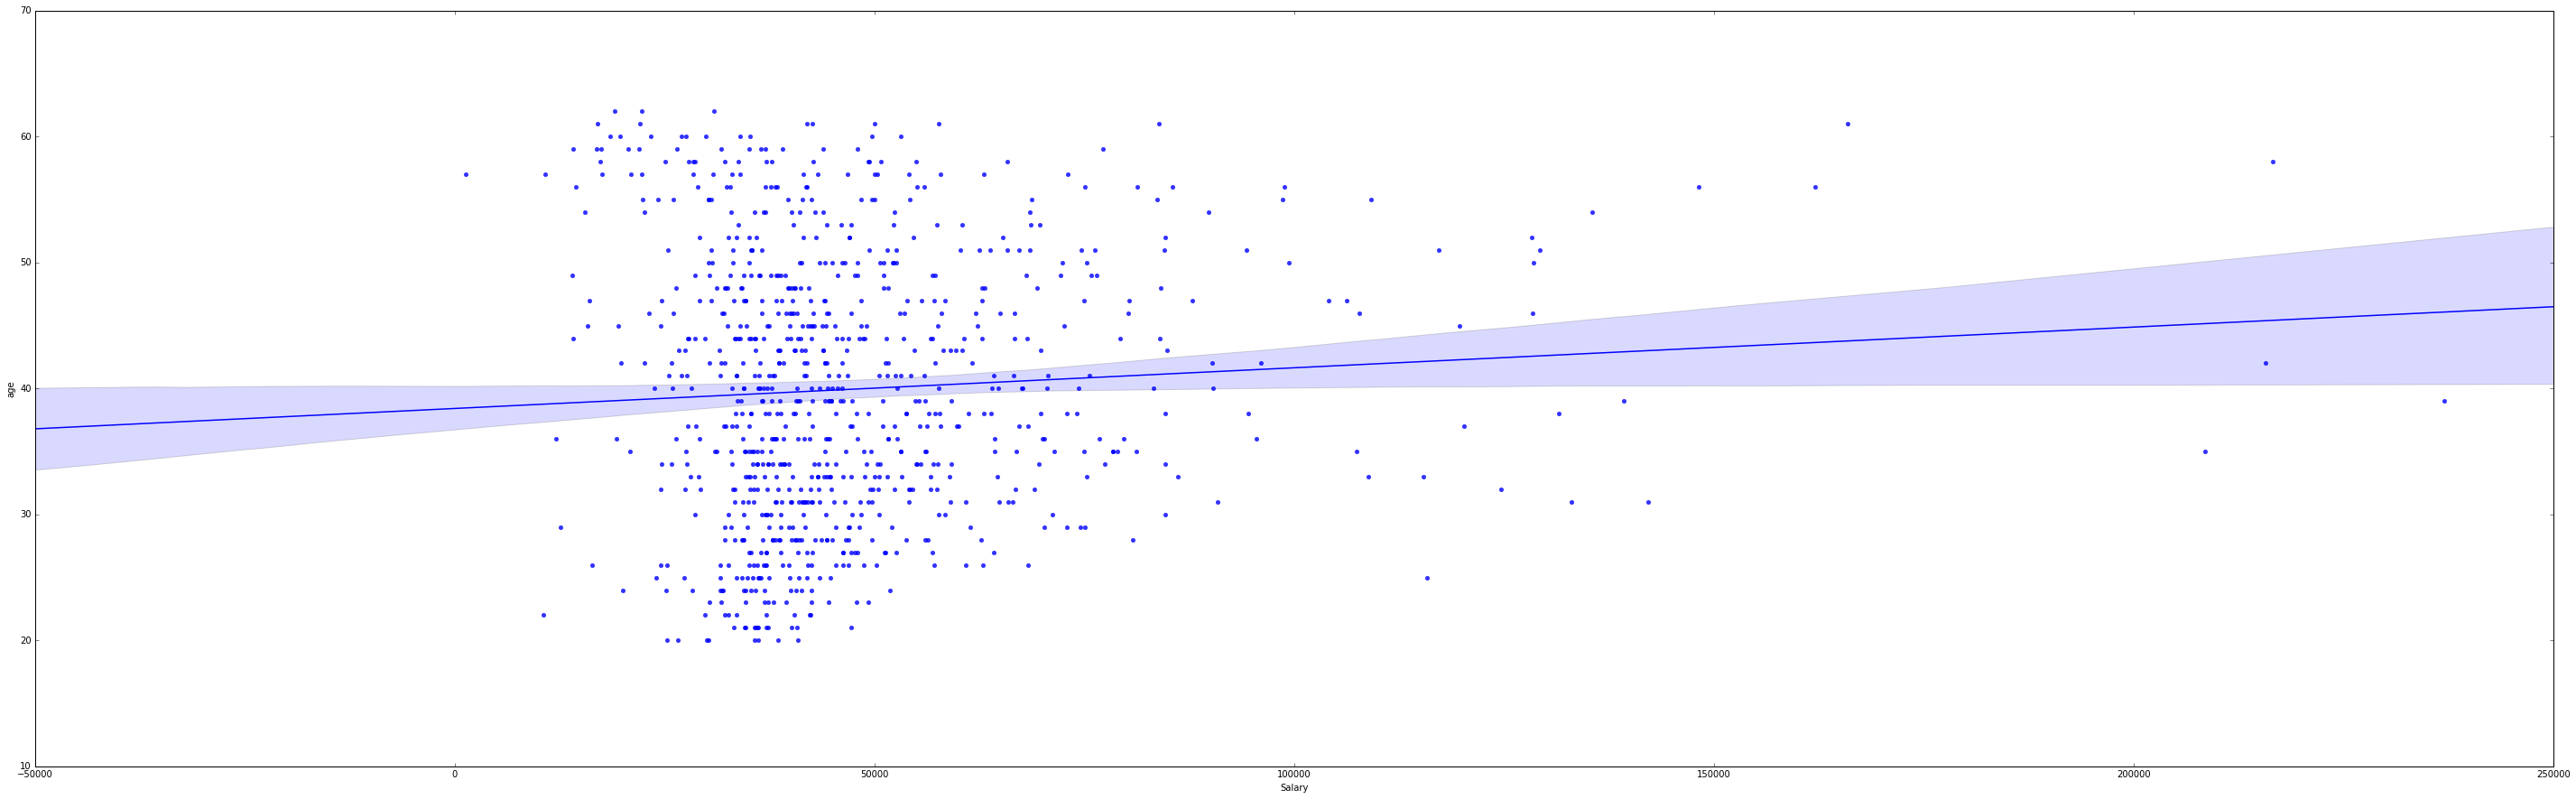

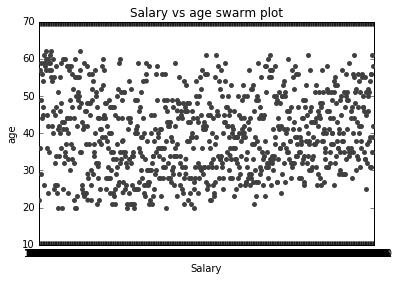

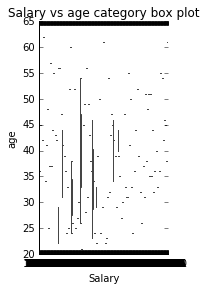

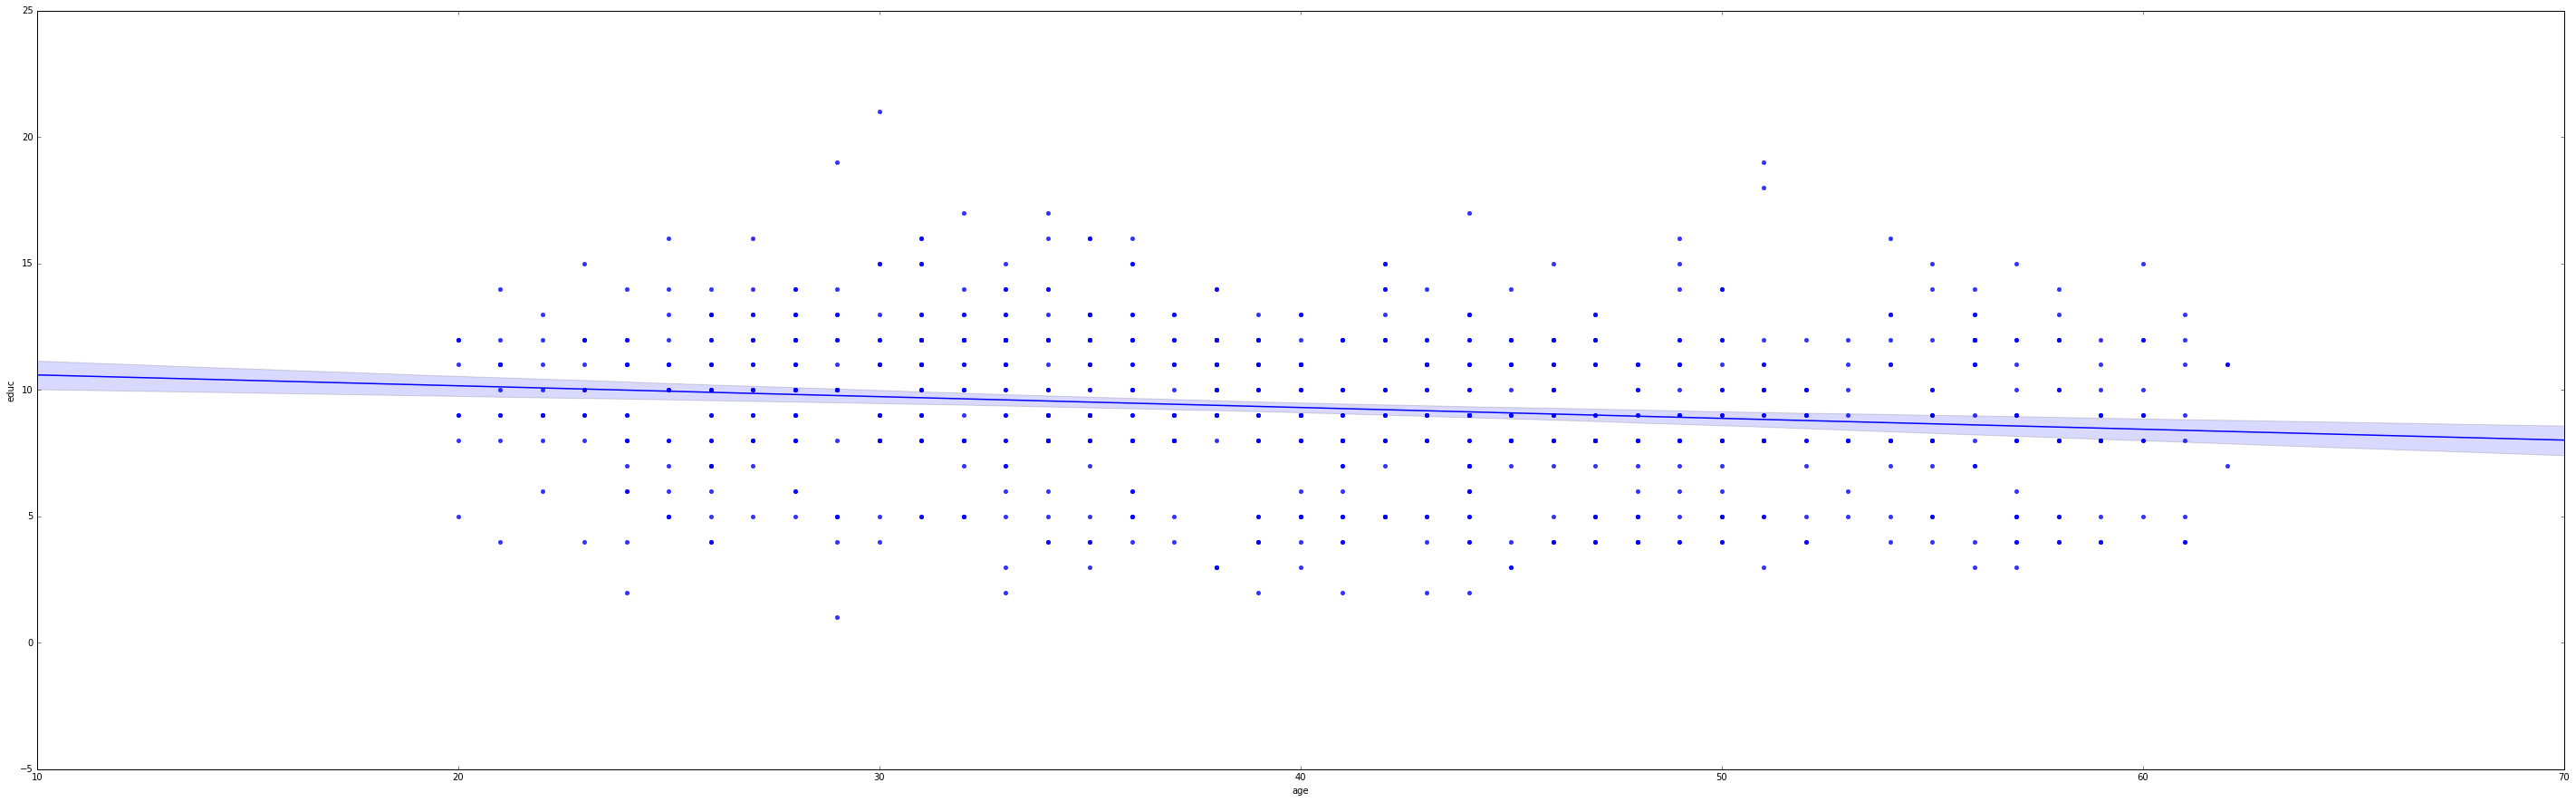

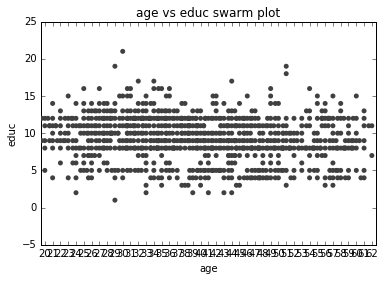

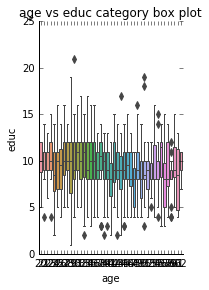

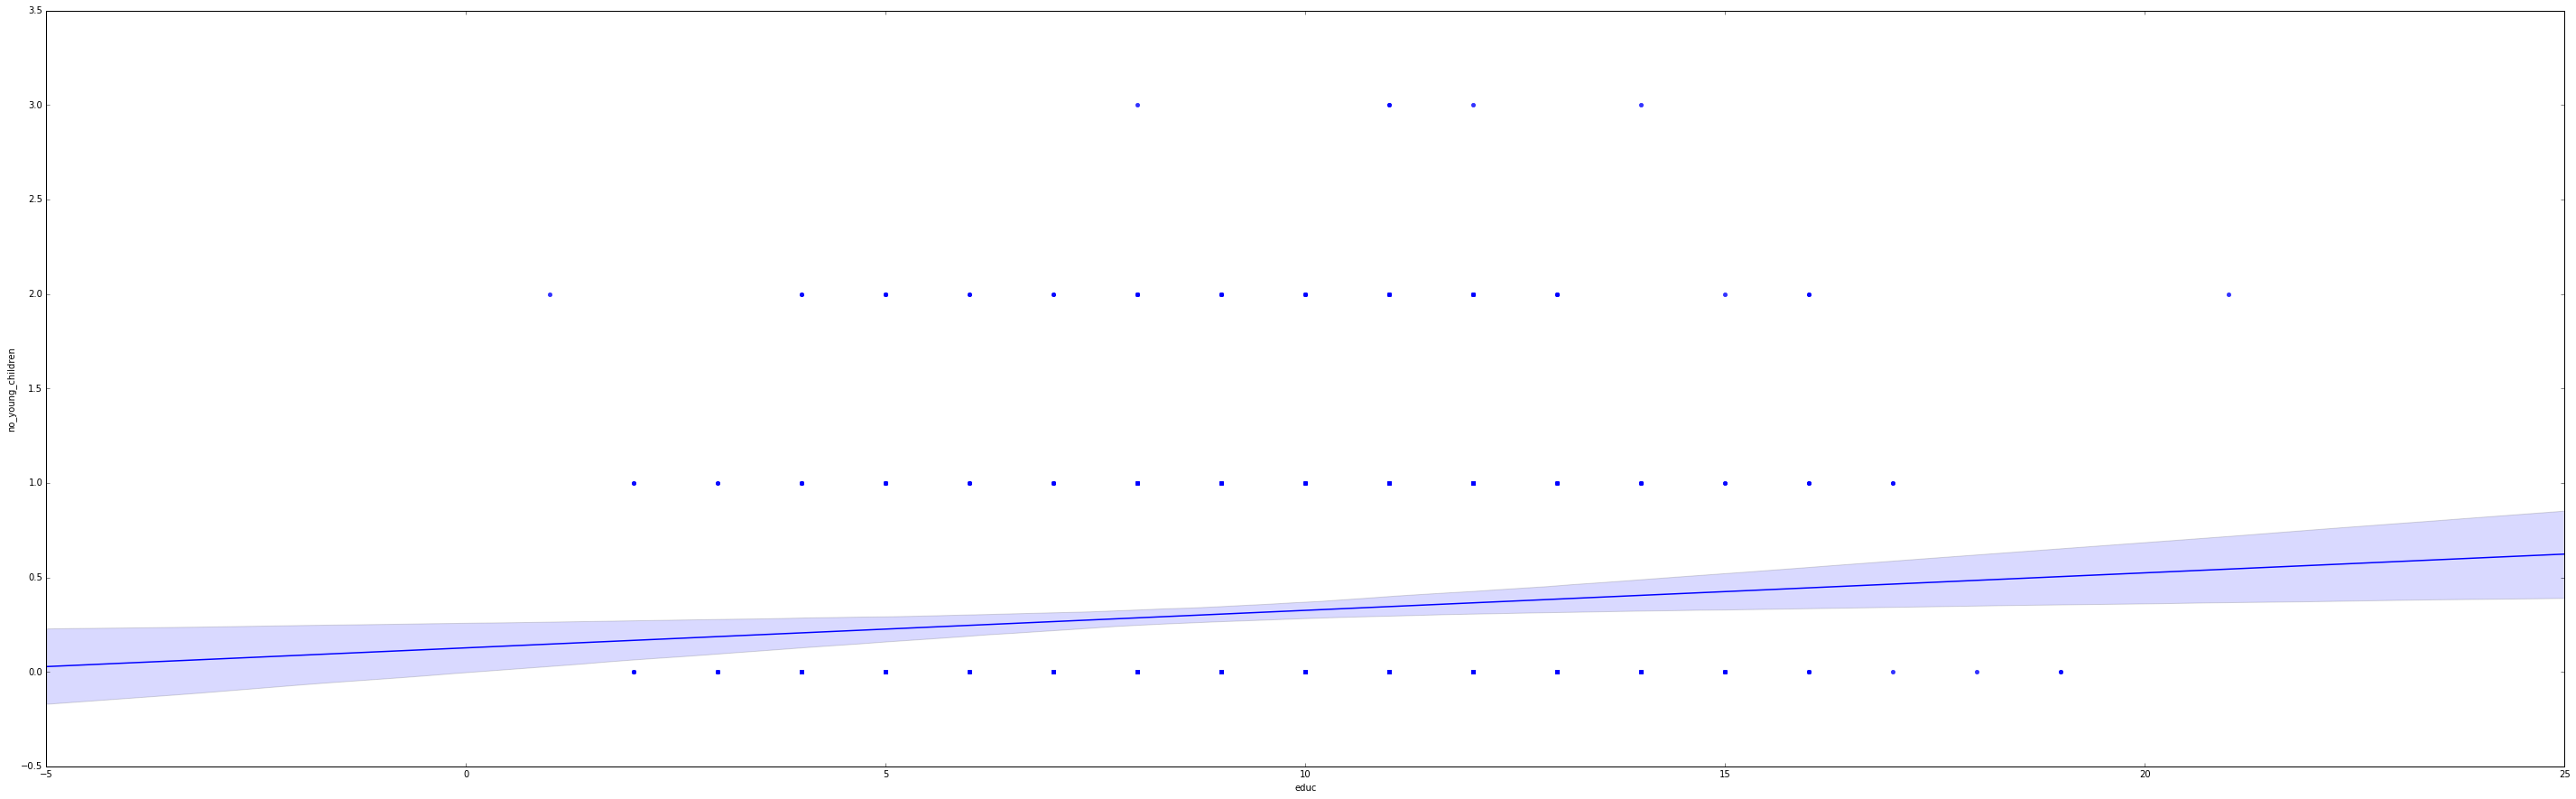

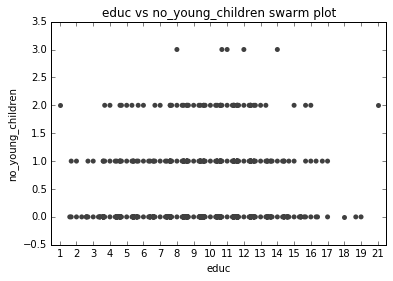

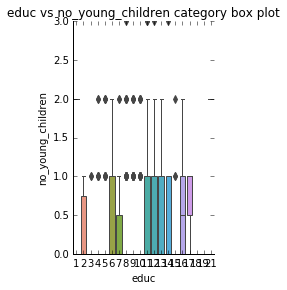

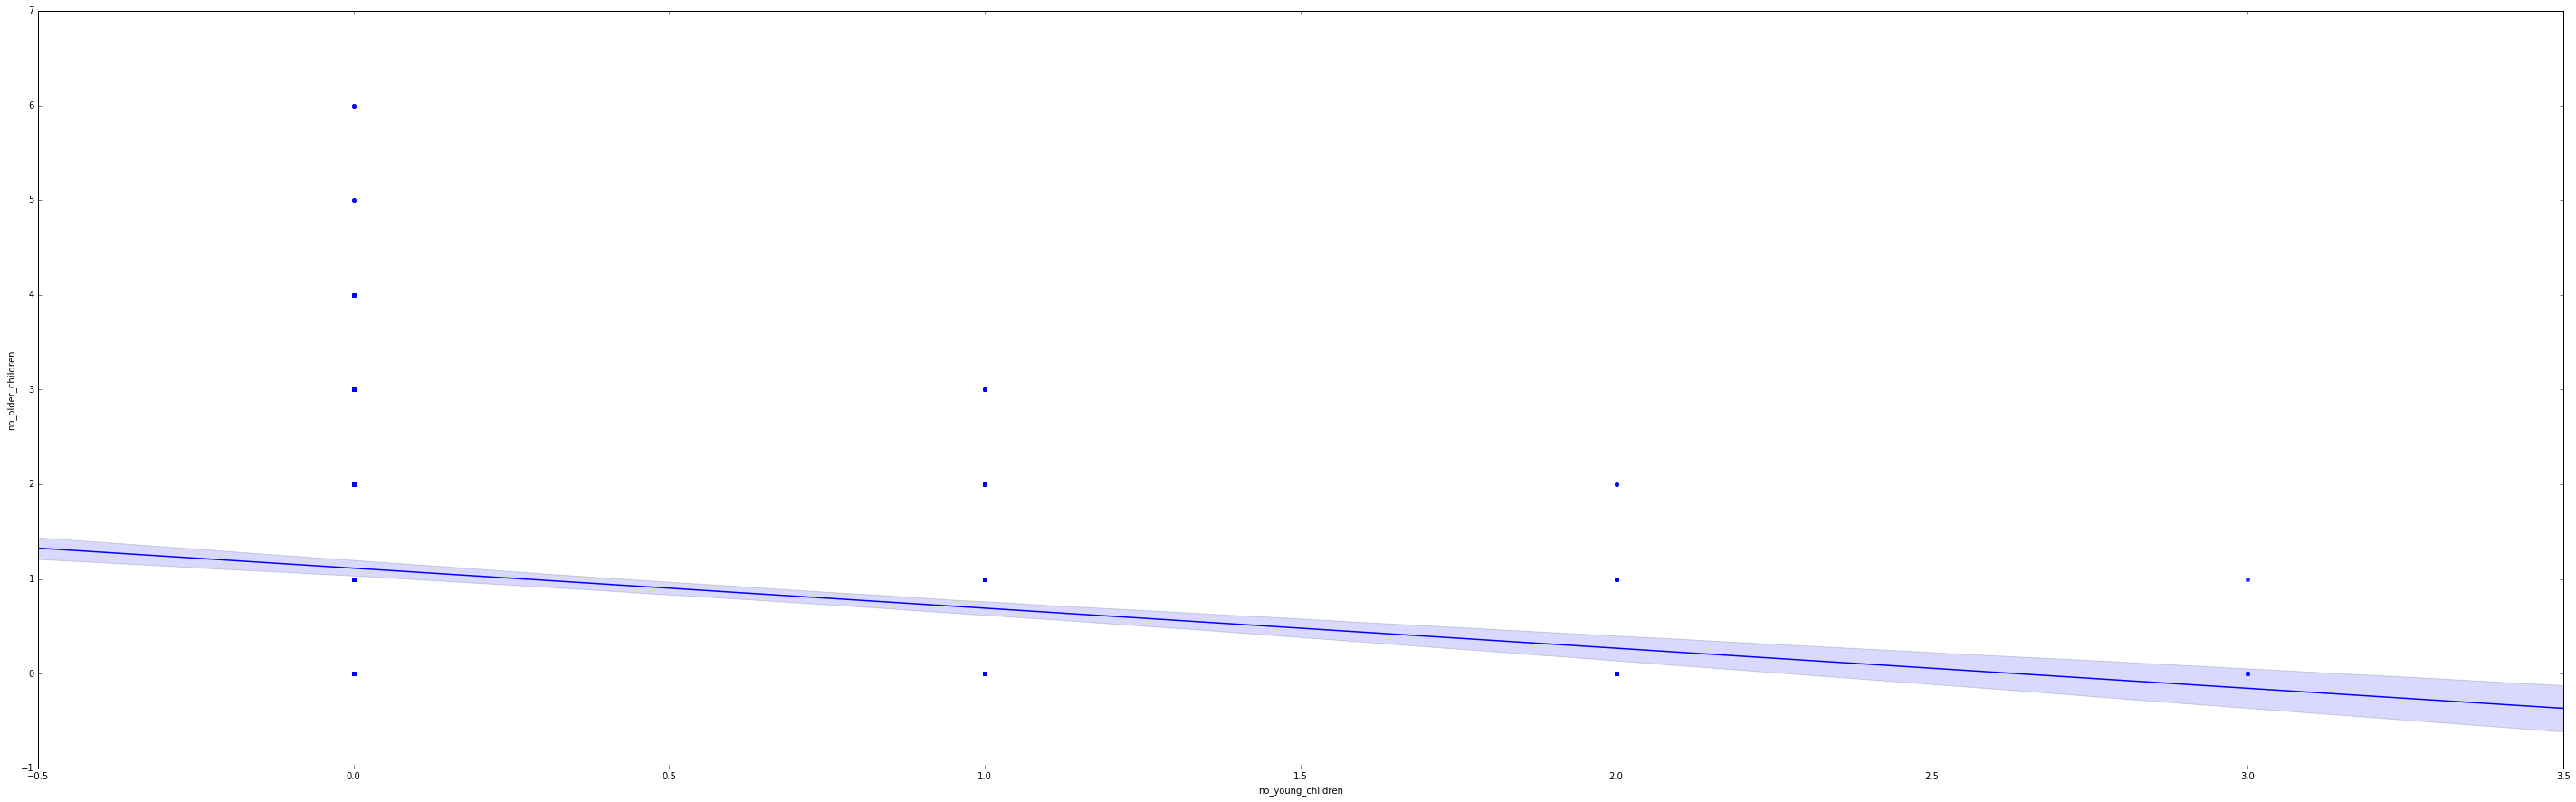

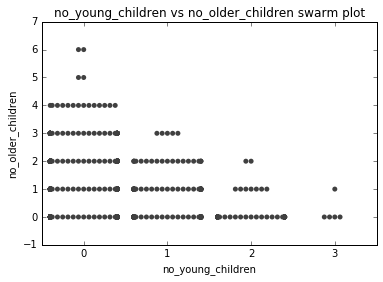

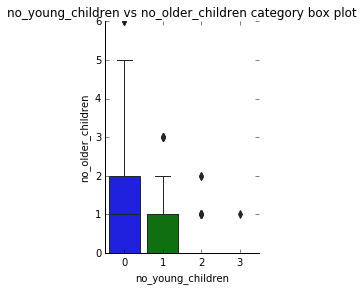

In [16]:
def regrswamcatplot(data):
        colnames=list(data.columns.values)
        for i in range(0,4):
            figure = plt.figure(figsize=(50,15))
            sns.regplot(x=colnames[i], y=colnames[i+1], data=data)
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
            
            sns.swarmplot(x=colnames[i], y=colnames[i+1], data=data,color=".25")
            plt.title(colnames[i]+ " vs "+colnames[i+1]+" swarm plot")
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
            
            sns.catplot(x=colnames[i], y=colnames[i+1],data=data, kind="box",height=4, aspect=.7)
            plt.title(colnames[i]+ " vs "+colnames[i+1]+" category box plot")
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
regrswamcatplot(cust_data)

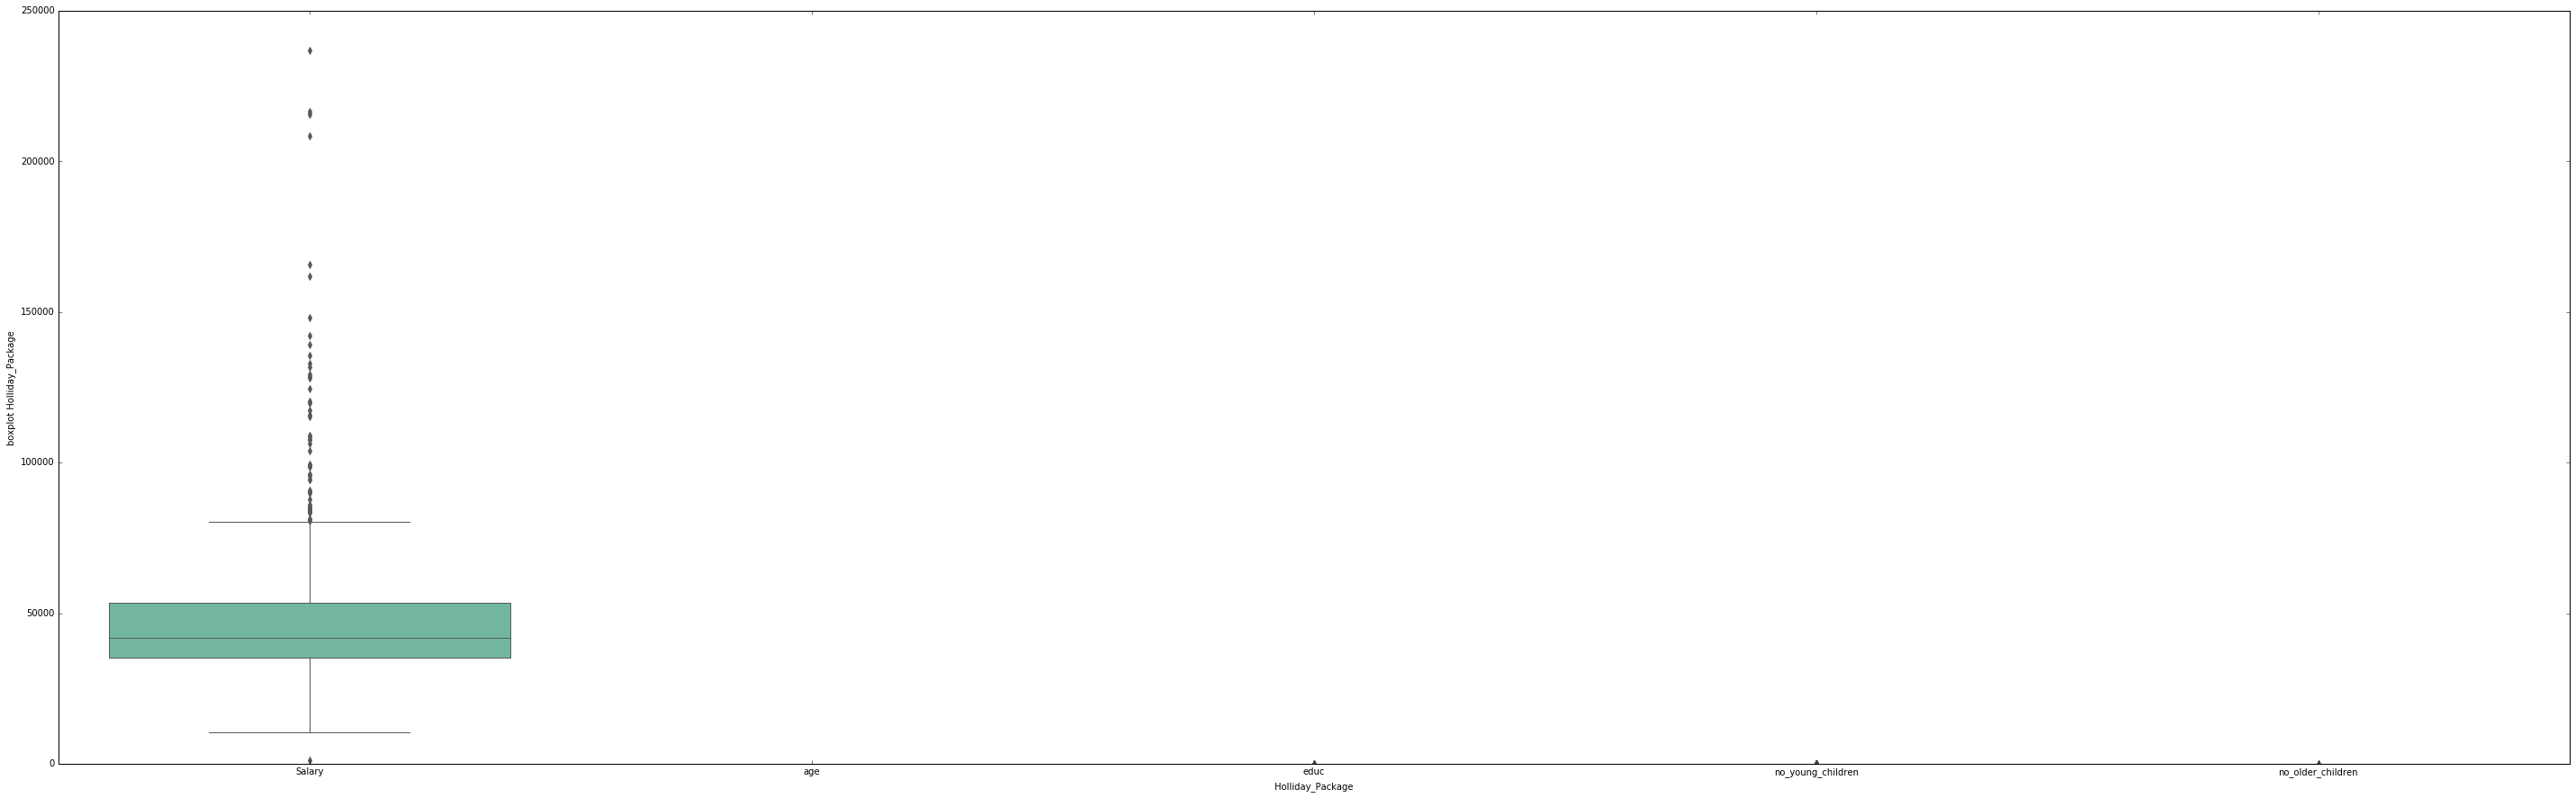

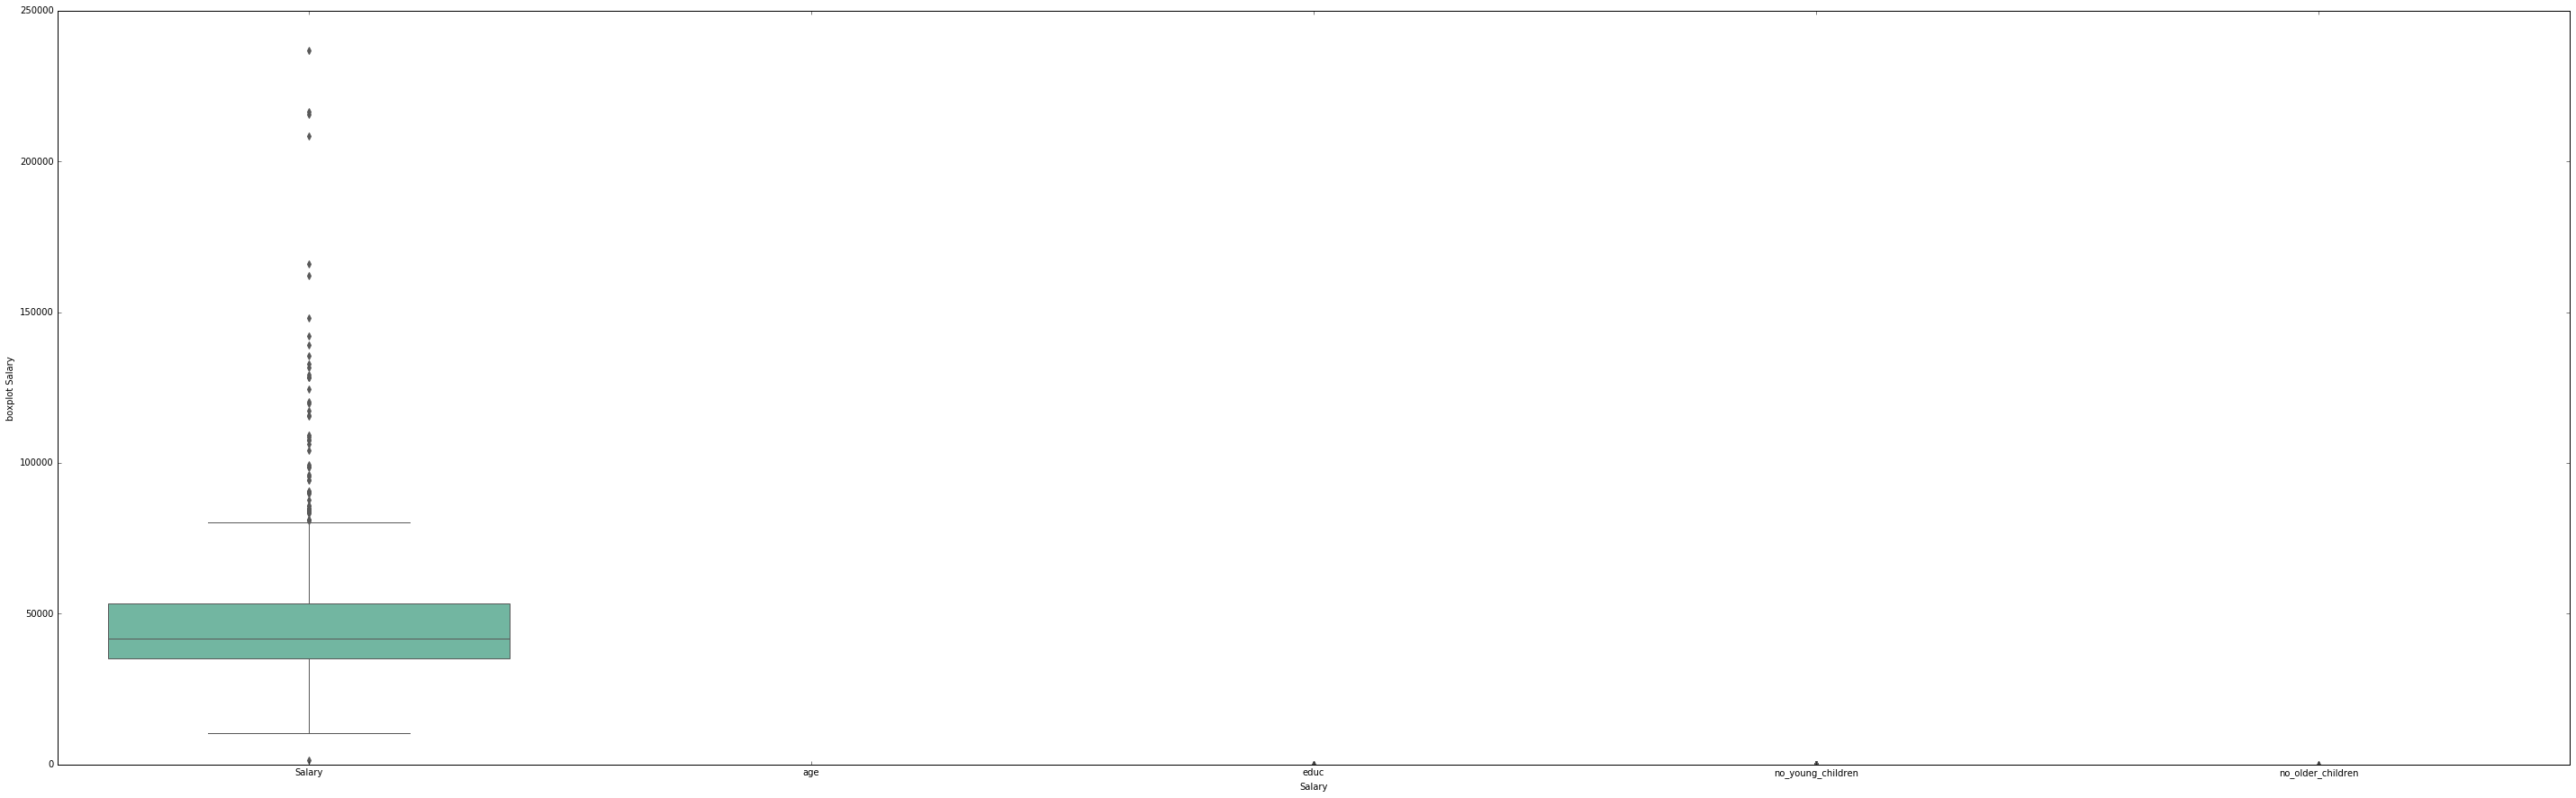

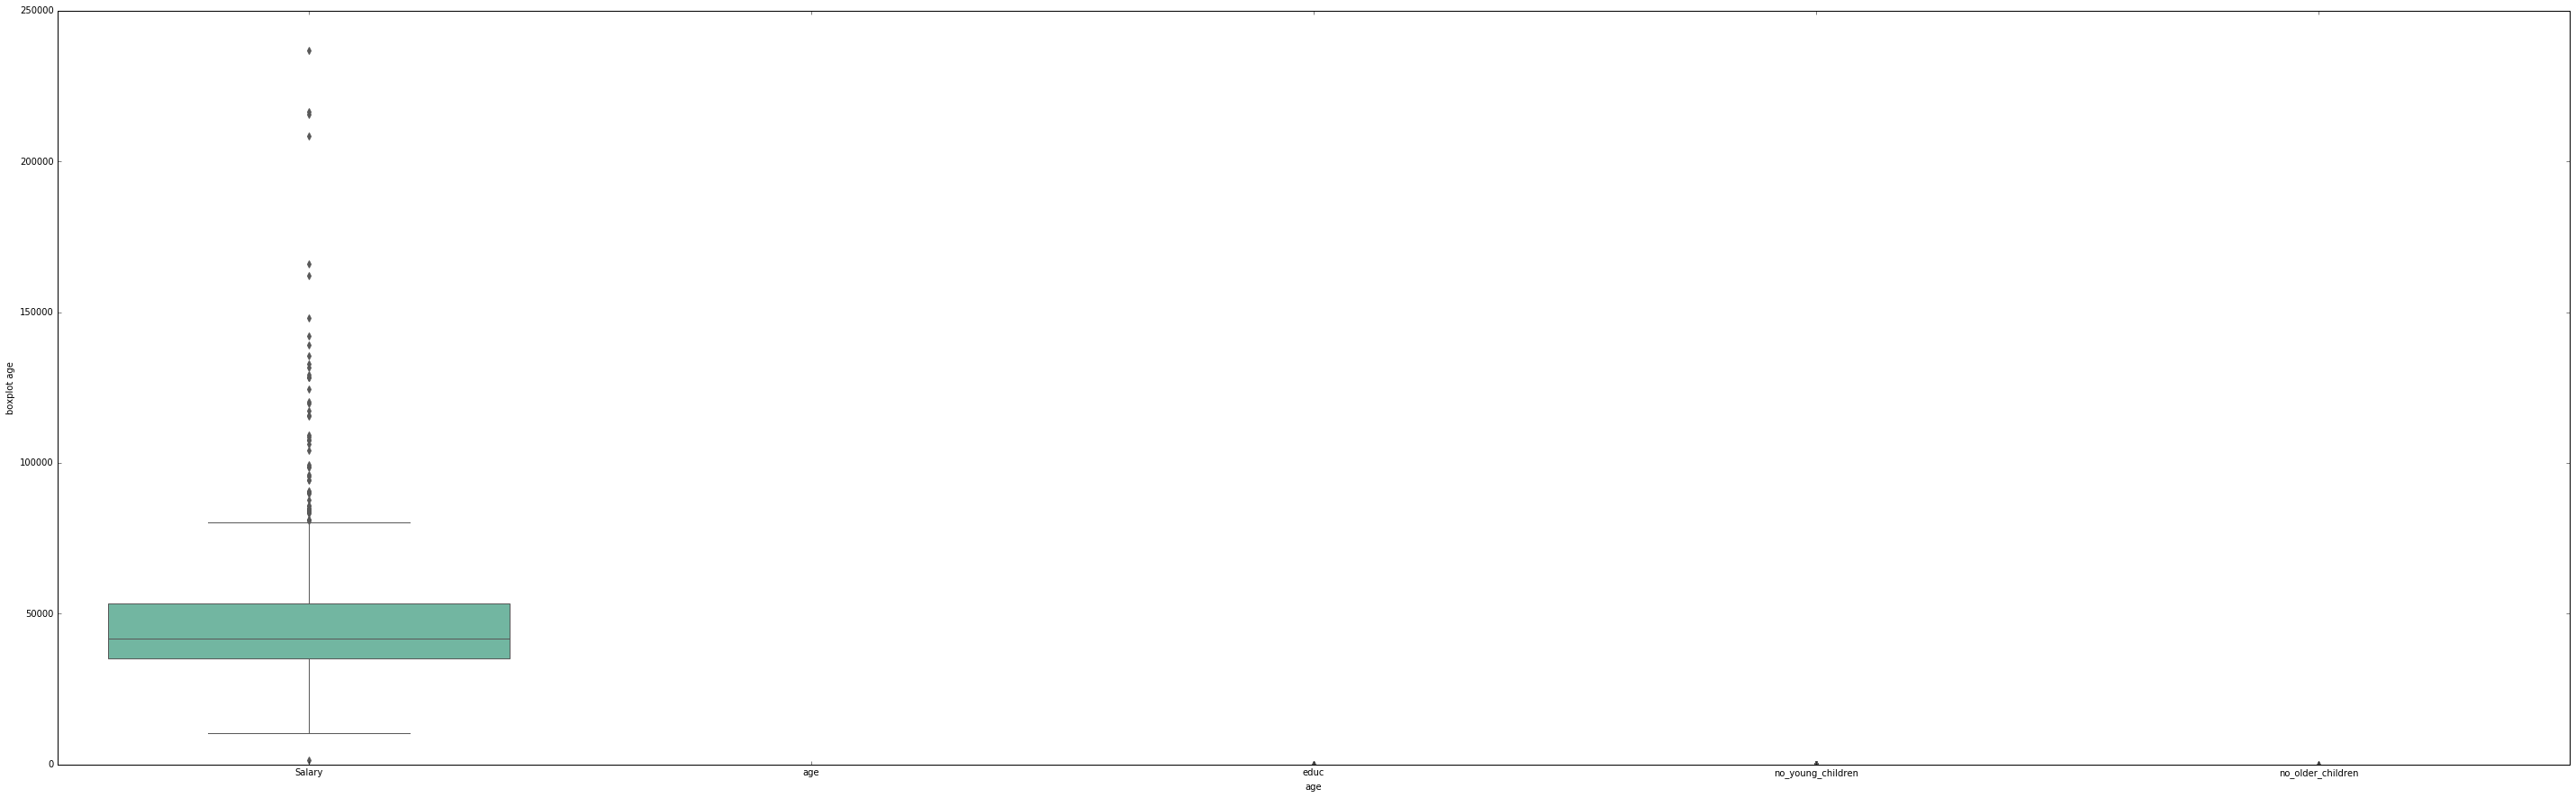

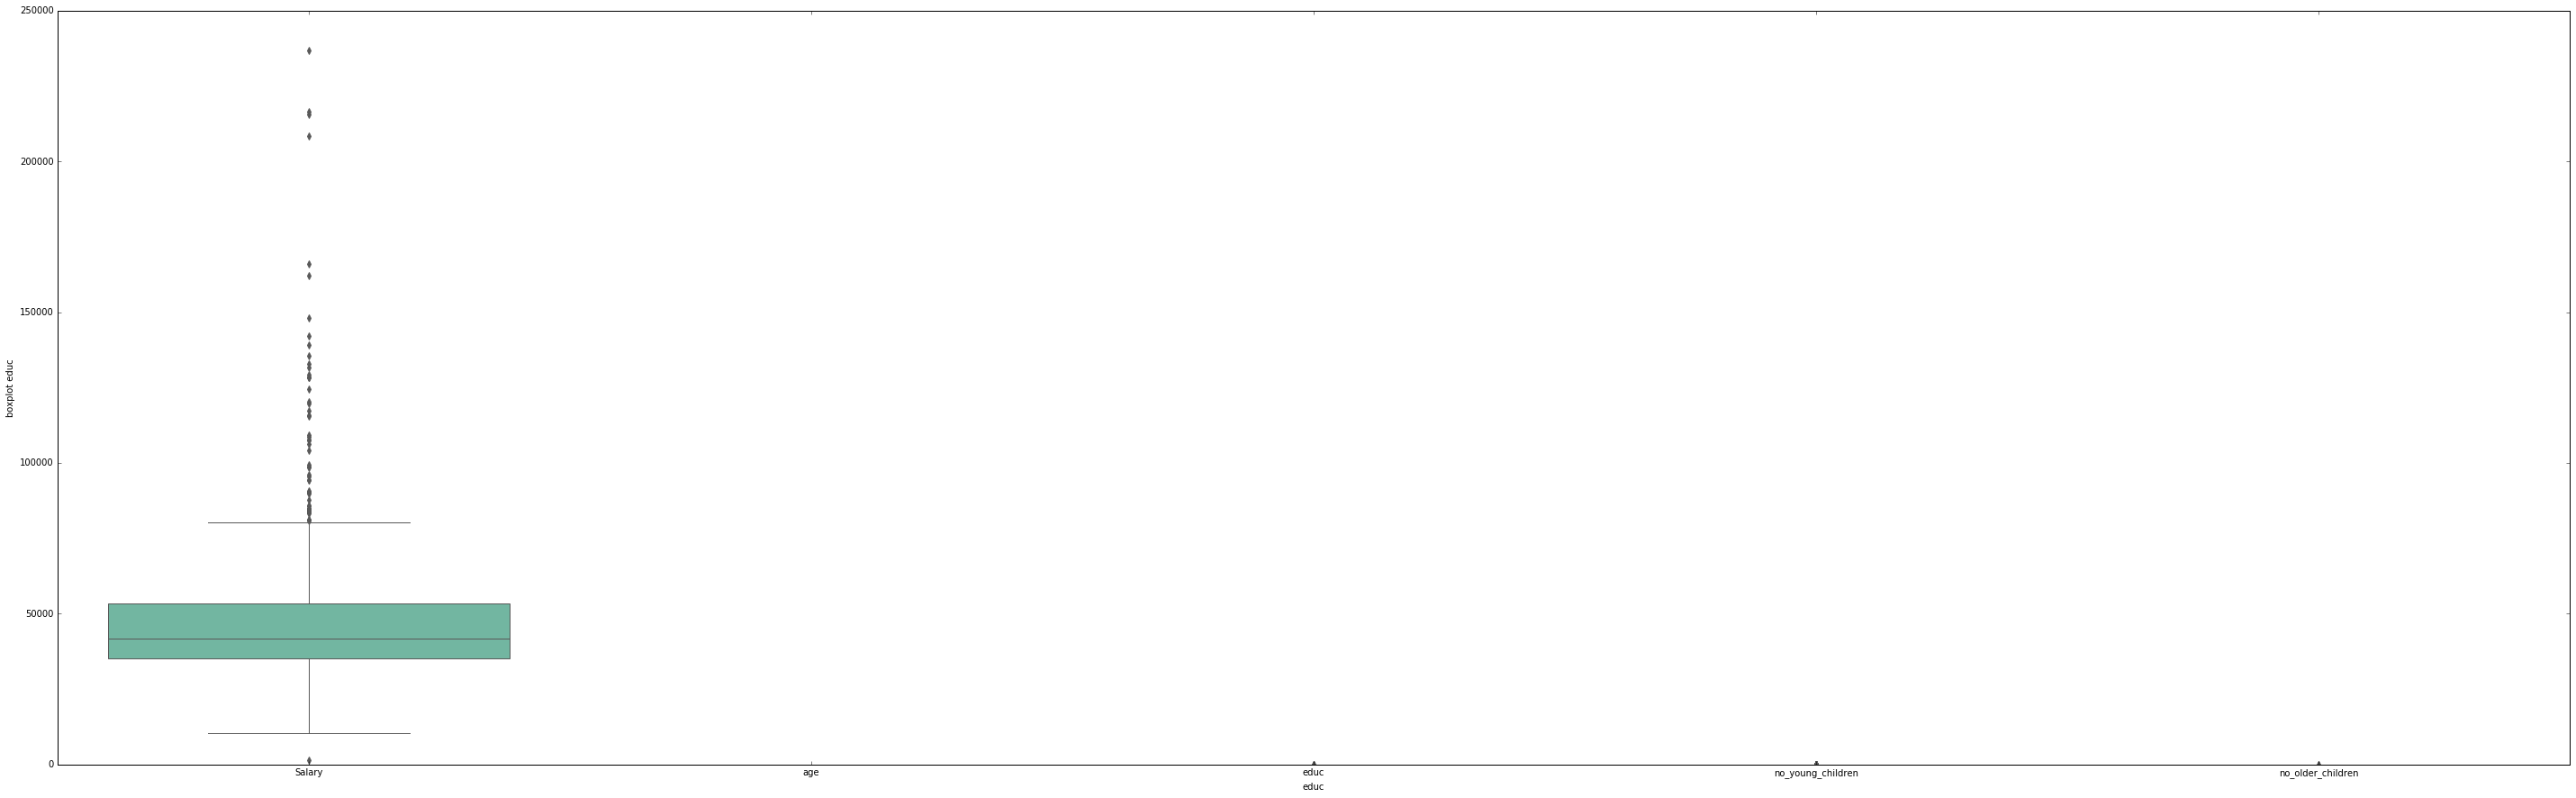

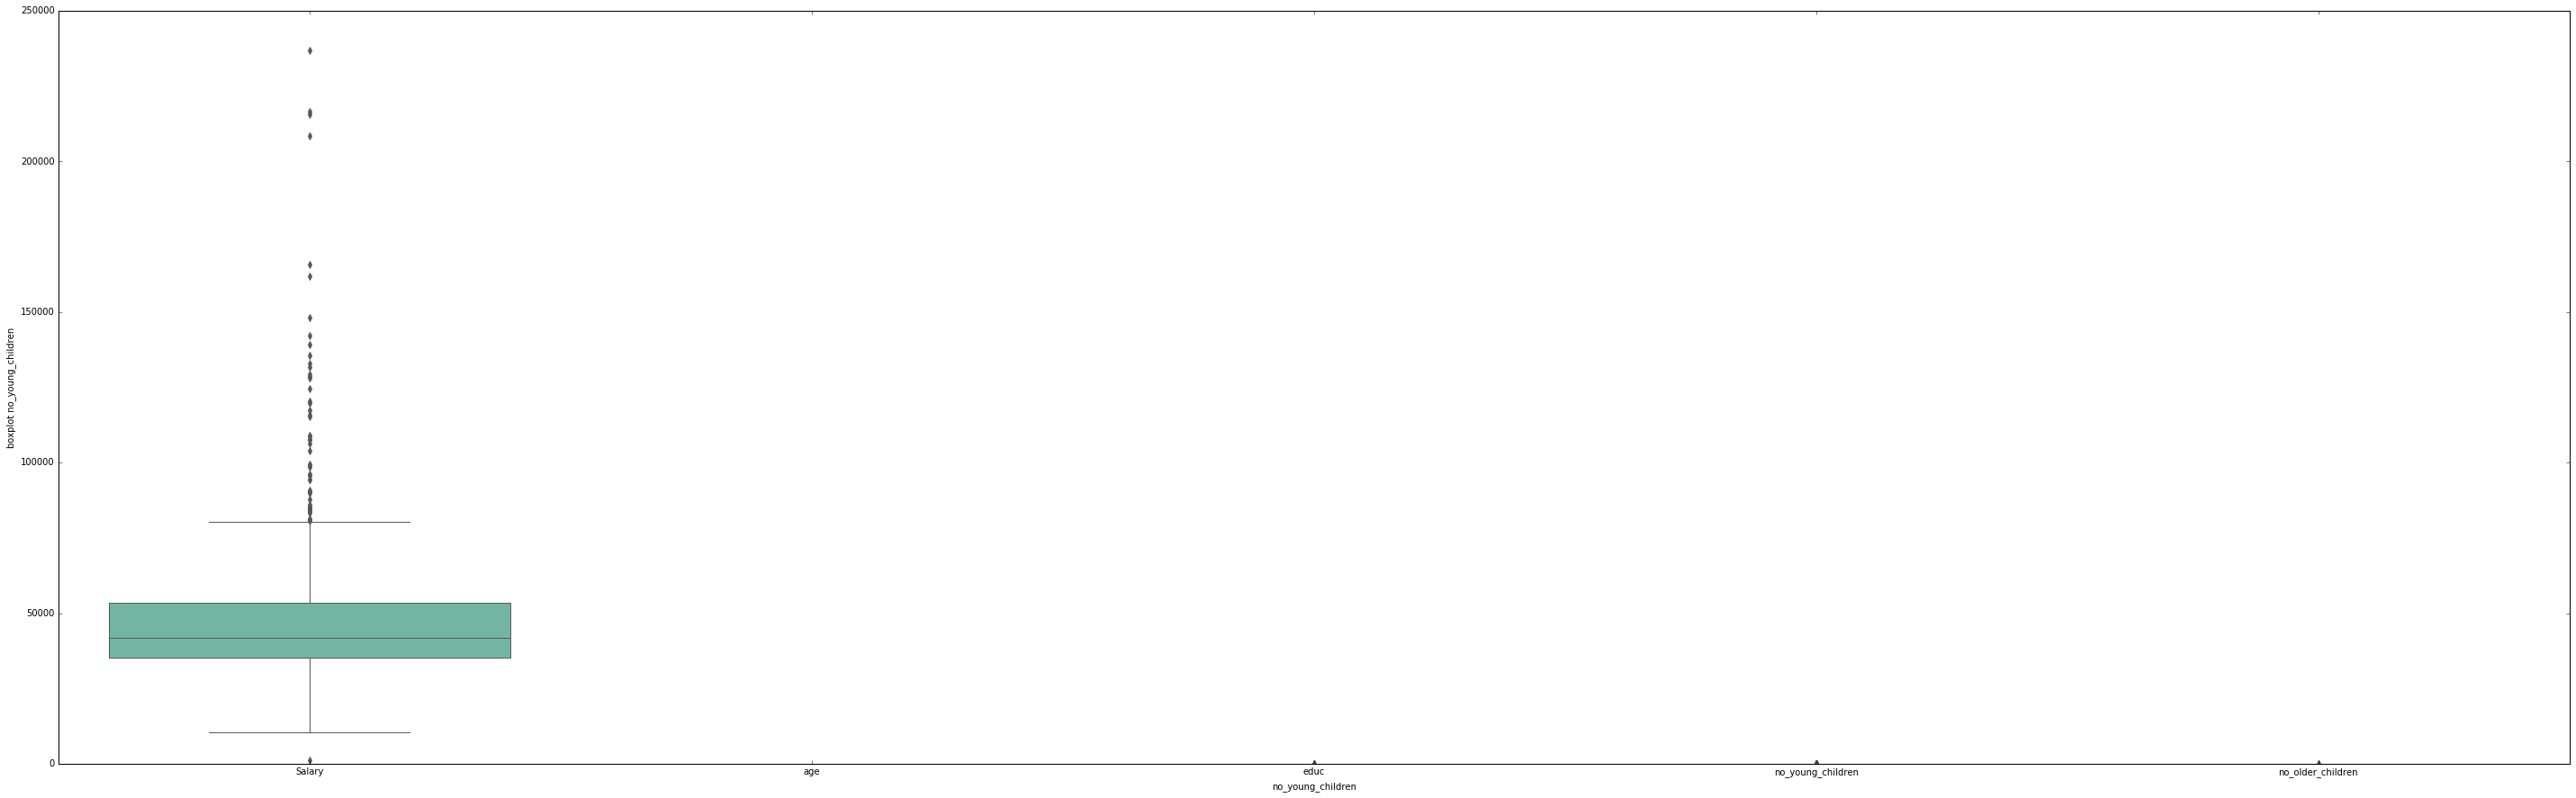

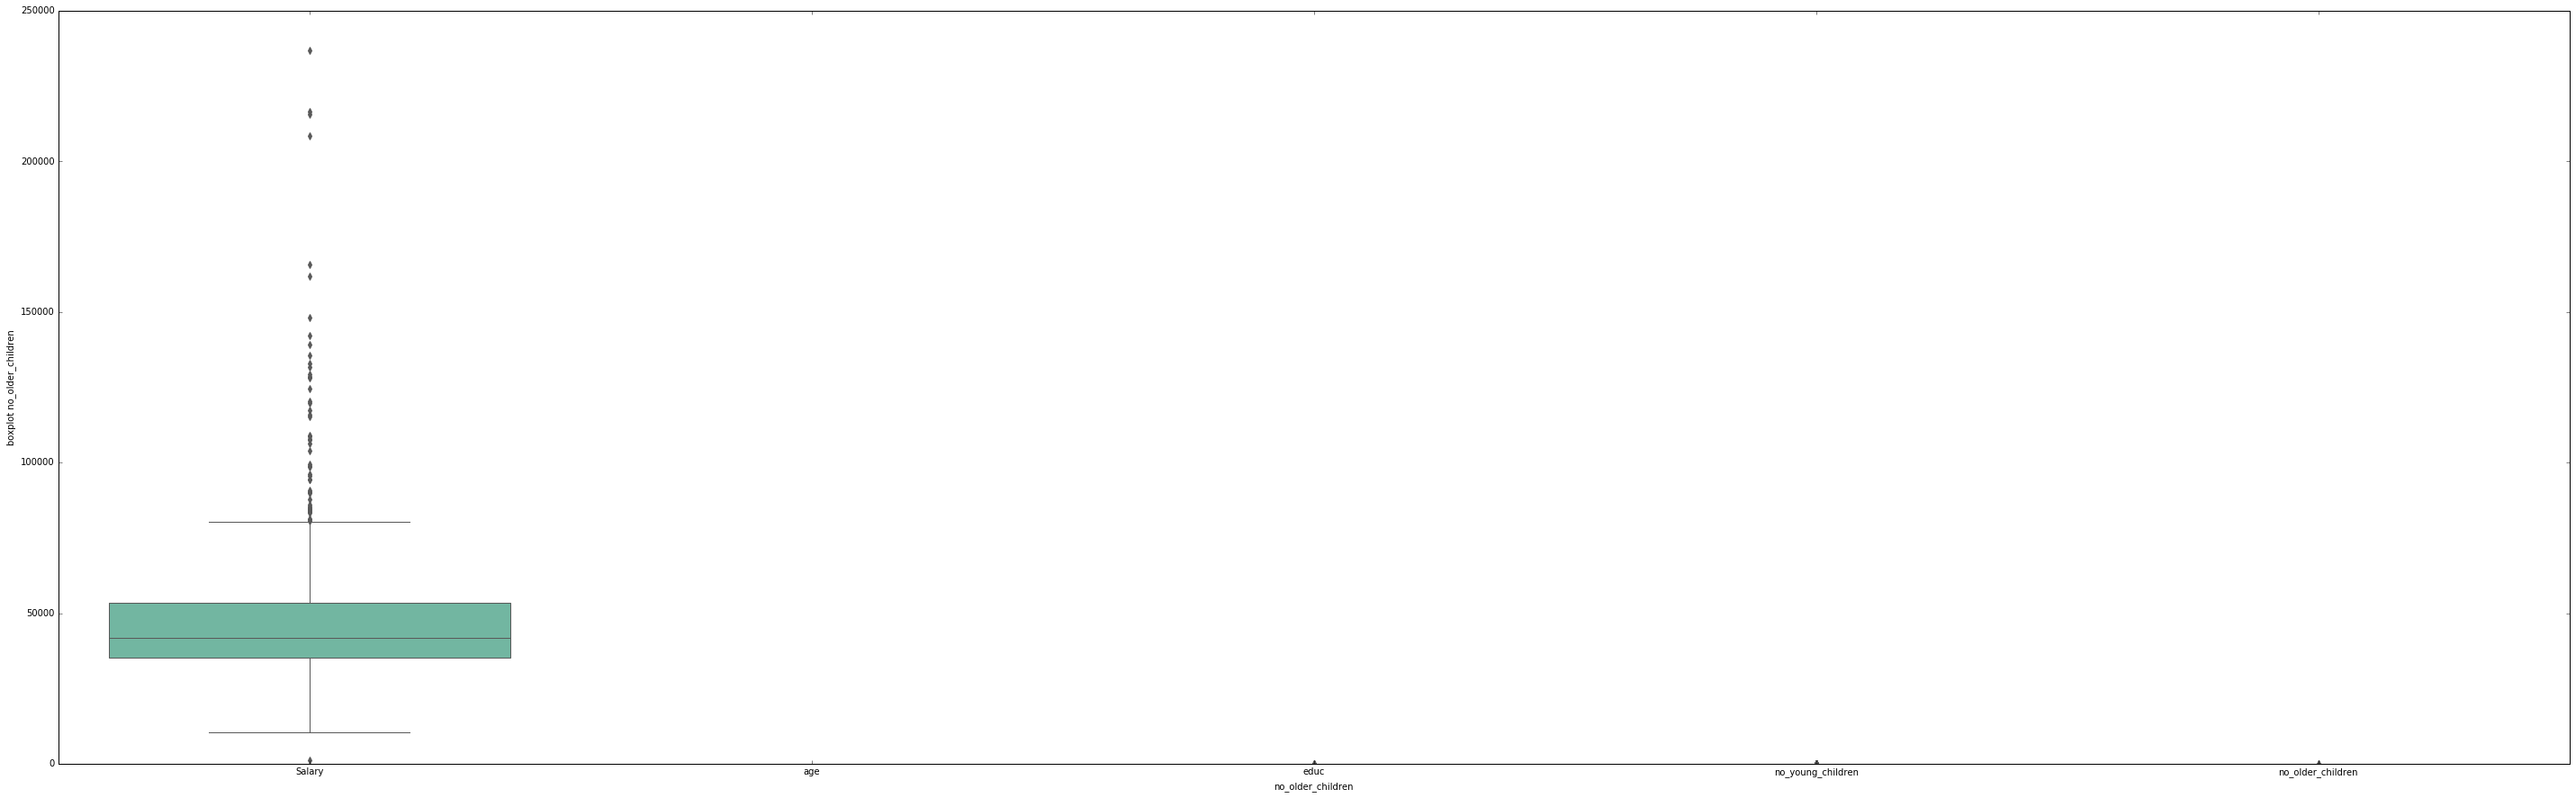

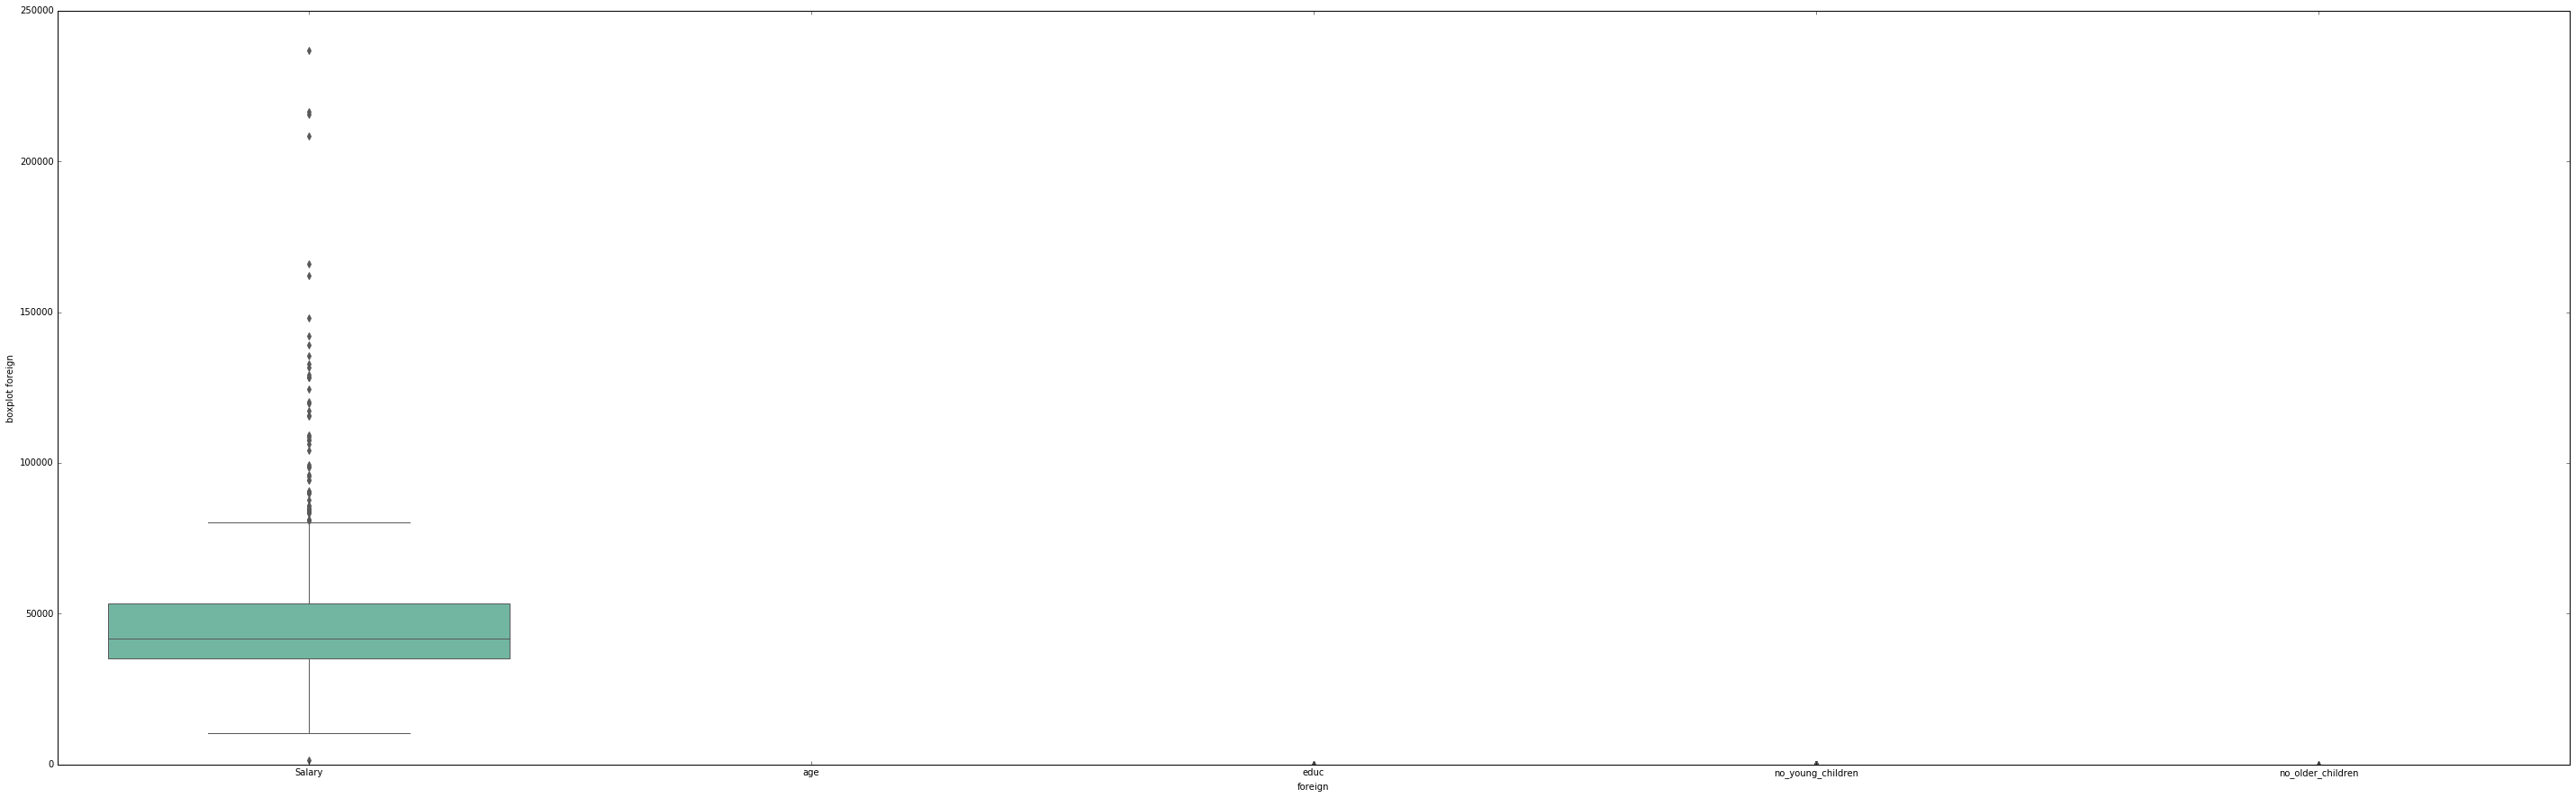

In [17]:
def boxplot(data):
        colnames=list(data.columns.values)
        for i in range(0,7):
            figure = plt.figure(figsize=(50,15))
            sns.boxplot(data=data, orient="v", palette="Set2")
            plt.xlabel(colnames[i])
            plt.ylabel("boxplot "+colnames[i])
            plt.show()
boxplot(data)

In [4]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [6]:
print(data.duplicated().sum())

0


In [5]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("Before removing Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())
def remove_outlier(col):
        sorted(col)
        Q1,Q3=np.percentile(col,[25,75])
        IQR=Q3-Q1
        lower_range= Q1-(1.5 * IQR)
        upper_range= Q3+(1.5 * IQR)
        return lower_range, upper_range
def outlrem():
        print(data.shape)
        for column in data.iloc[:, 0:data.shape[1]].columns:
            lr,ur=remove_outlier(data[column])
            data[column]=np.where(data[column]>ur,ur,data[column])
            data[column]=np.where(data[column]<lr,lr,data[column])

        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        print("After removing Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())
outlrem()
print("isnull sum\n",data.isnull().sum())
print("isna sum\n",data.isna().sum())
print(data.head(5))
data.to_csv('D:/GL/Total DS Codes2/Pred Model/Assignment Project/Final Files/HolPack.csv')

Before removing Outlier sum
 Holliday_Package       0
Salary                57
age                    0
educ                   4
no_young_children    207
no_older_children      2
foreign              216
dtype: int64
(872, 7)
After removing Outlier sum
 Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64
isnull sum
 Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64
isna sum
 Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64
   Holliday_Package   Salary   age  educ  no_young_children  \
0               0.0  48412.0  30.0   8.0                0.0   
1               1.0  37207.0  45.0   8.0                0.0   
2            

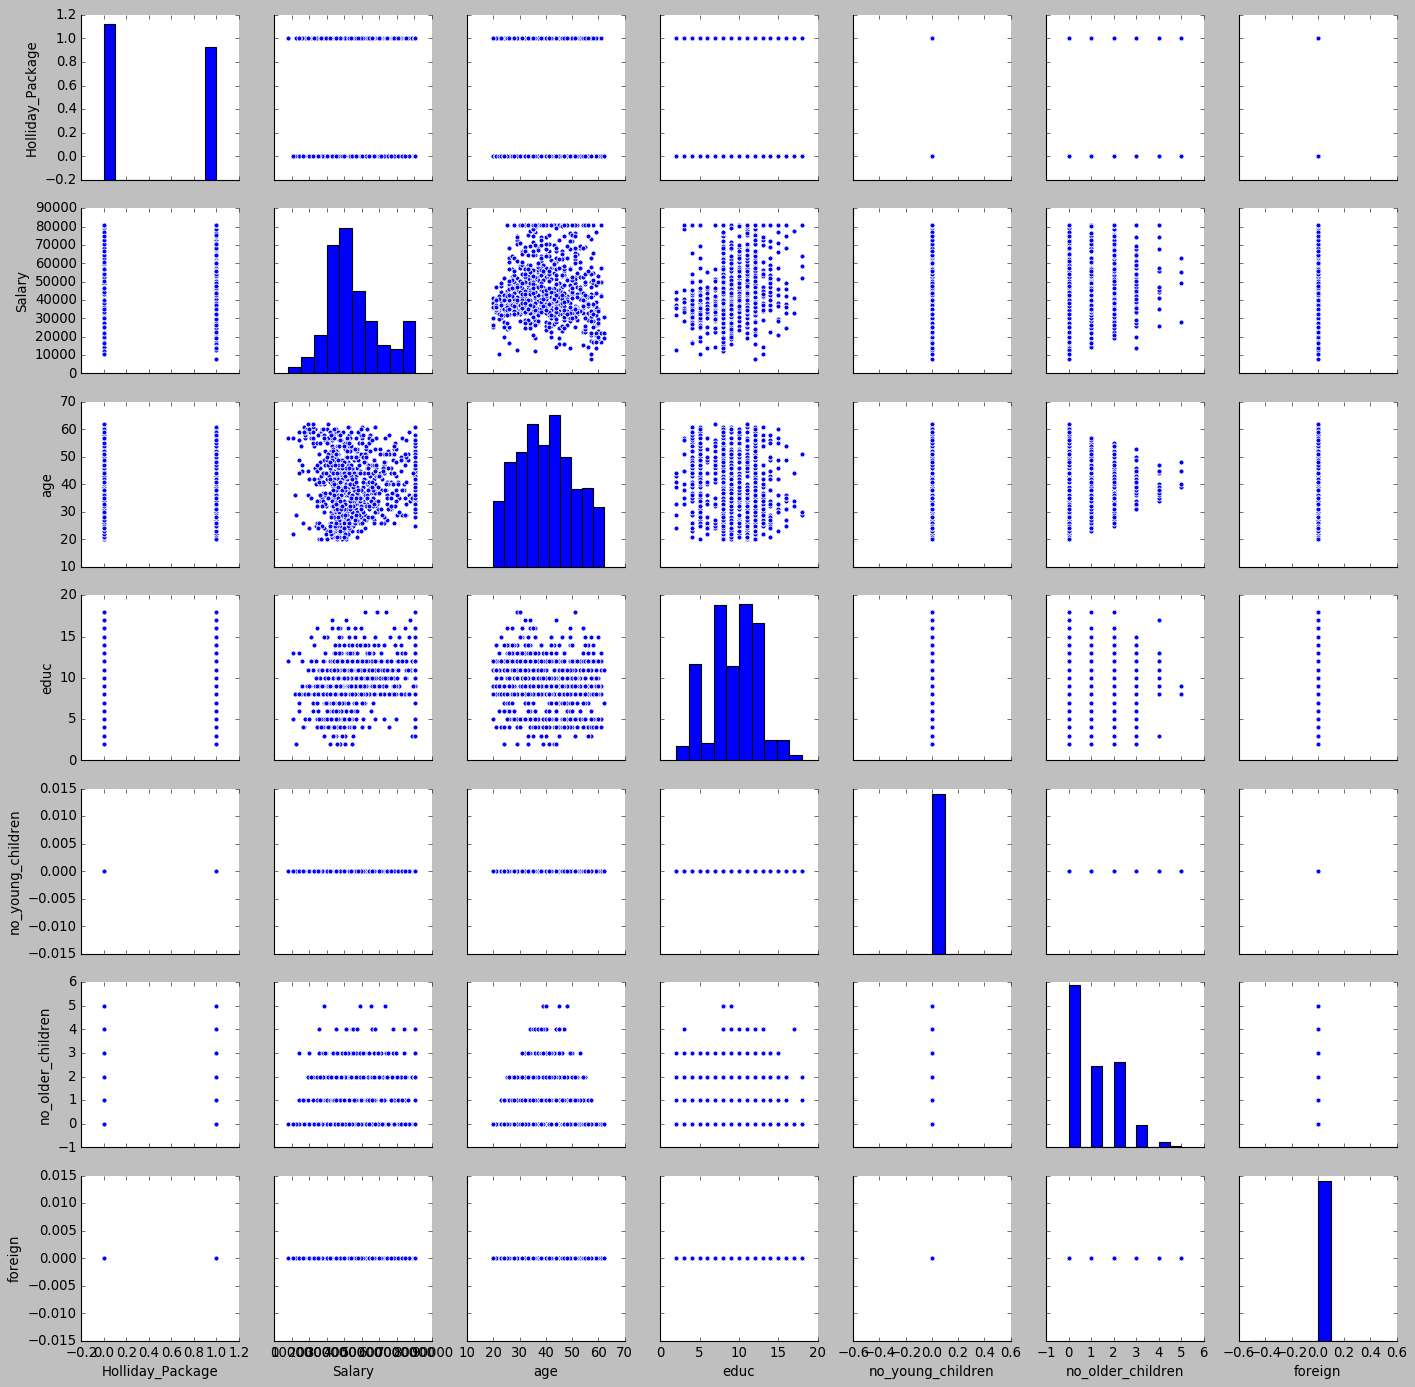

In [8]:
pairdata=pd.read_csv("D:/GL/Total DS Codes2/Pred Model/Assignment Project/Final Files/HolPack.csv")
sns.pairplot(pairdata)
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# Copy all the predictor variables into X dataframe
X = data.drop('Holliday_Package', axis=1)
# Copy target into the y dataframe. 
y = data[['Holliday_Package']]
# Split X and y into training and test set in 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
model = LogisticRegression()
model.fit(X_train, y_train)
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)
ytrain_predict_prob=model.predict_proba(X_train)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(X_test)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())

y train pred head 
           0         1
0  0.542909  0.457091
1  0.545026  0.454974
2  0.641754  0.358246
3  0.590973  0.409027
4  0.465485  0.534515
y test pred head 
           0         1
0  0.619679  0.380321
1  0.545665  0.454335
2  0.556051  0.443949
3  0.627276  0.372724
4  0.463013  0.536987


C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.53      0.90      0.67       326
         1.0       0.43      0.08      0.14       284

    accuracy                           0.52       610
   macro avg       0.48      0.49      0.40       610
weighted avg       0.48      0.52      0.42       610



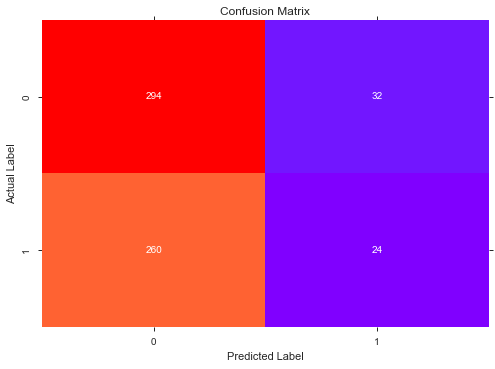

0.521311475409836


In [23]:
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
print(classification_report(y_train,ytrain_predict))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
print(model.score(X_train, y_train))

              precision    recall  f1-score   support

         0.0       0.56      0.91      0.70       145
         1.0       0.54      0.13      0.21       117

    accuracy                           0.56       262
   macro avg       0.55      0.52      0.45       262
weighted avg       0.55      0.56      0.48       262



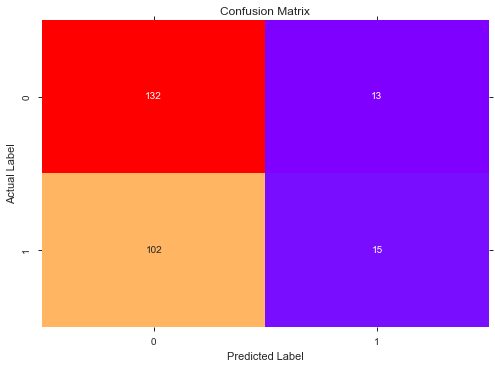

0.5610687022900763


In [24]:
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
print(classification_report(y_test,ytest_predict))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
print(model.score(X_test, y_test))

AUC: 0.568


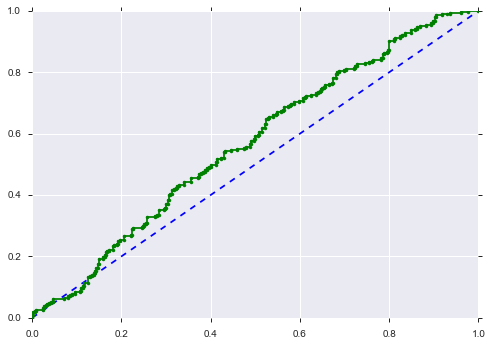

In [25]:
probs = model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.612


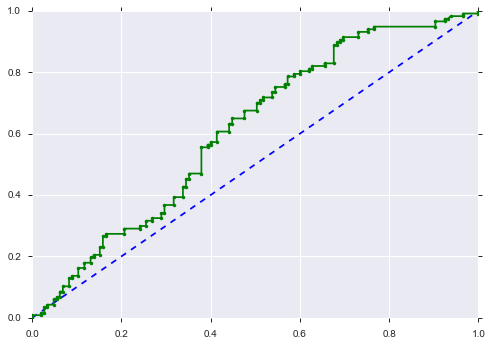

In [26]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.568


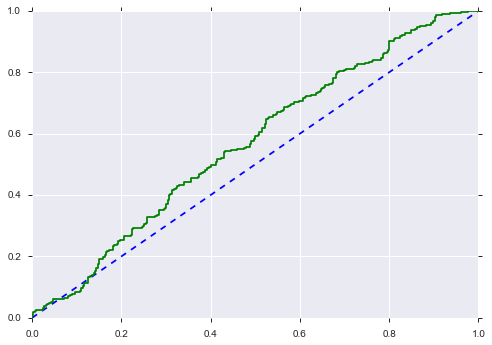

In [27]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logit_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr)

AUC: 0.612


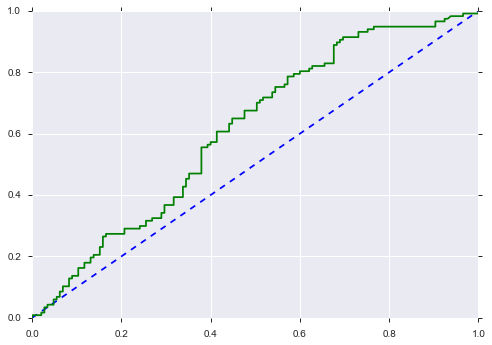

In [28]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logit_test_auc)
# calculate roc curve
logit_test_fpr, logit_test_tpr, logit_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_test_fpr, logit_test_tpr)

In [29]:
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
logit_train_acc=model.score(X_train,y_train) 
print(logit_train_acc)
print(classification_report(y_train, ytrain_predict))
logit_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_train_precision=round(df.loc["1.0"][1],2)
logit_train_recall=round(df.loc["1.0"][2],2)
logit_train_f1=round(df.loc["1.0"][0],2)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

[[294  32]
 [260  24]]
0.521311475409836
              precision    recall  f1-score   support

         0.0       0.53      0.90      0.67       326
         1.0       0.43      0.08      0.14       284

    accuracy                           0.52       610
   macro avg       0.48      0.49      0.40       610
weighted avg       0.48      0.52      0.42       610

logit_train_precision  0.43
logit_train_recall  0.08
logit_train_f1  0.14


In [30]:
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
logit_test_acc=model.score(X_test,y_test)
print(logit_test_acc)
print(classification_report(y_test, ytest_predict))
logit_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_test_precision=round(df.loc["1.0"][1],2)
logit_test_recall=round(df.loc["1.0"][2],2)
logit_test_f1=round(df.loc["1.0"][0],2)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

[[132  13]
 [102  15]]
0.5610687022900763
              precision    recall  f1-score   support

         0.0       0.56      0.91      0.70       145
         1.0       0.54      0.13      0.21       117

    accuracy                           0.56       262
   macro avg       0.55      0.52      0.45       262
weighted avg       0.55      0.56      0.48       262

logit_test_precision  0.54
logit_test_recall  0.13
logit_test_f1  0.21


In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)
ytrain_predict_prob=model.predict_proba(X_train)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(X_test)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())

y train pred head 
           0         1
0  0.575430  0.424570
1  0.401844  0.598156
2  0.705815  0.294185
3  0.723109  0.276891
4  0.561683  0.438317
y test pred head 
           0         1
0  0.675810  0.324190
1  0.498832  0.501168
2  0.463127  0.536873
3  0.679632  0.320368
4  0.292982  0.707018


C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


              precision    recall  f1-score   support

         0.0       0.58      0.62      0.60       326
         1.0       0.52      0.47      0.50       284

    accuracy                           0.55       610
   macro avg       0.55      0.55      0.55       610
weighted avg       0.55      0.55      0.55       610



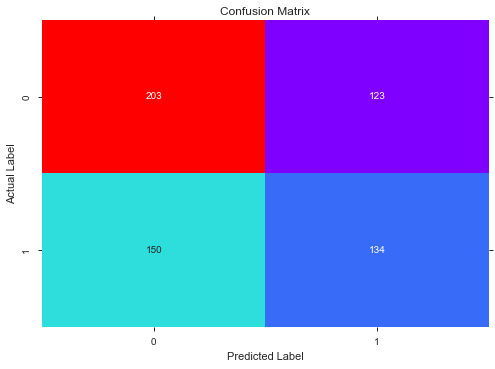

0.5524590163934426


In [32]:
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
print(classification_report(y_train,ytrain_predict))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
print(model.score(X_train, y_train))

              precision    recall  f1-score   support

         0.0       0.66      0.61      0.64       145
         1.0       0.56      0.62      0.59       117

    accuracy                           0.61       262
   macro avg       0.61      0.61      0.61       262
weighted avg       0.62      0.61      0.62       262



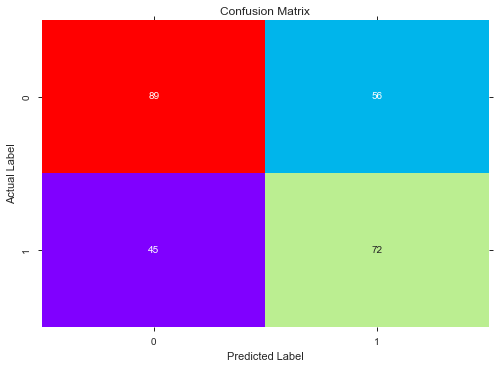

0.6145038167938931


In [33]:
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
print(classification_report(y_test,ytest_predict))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
print(model.score(X_test, y_test))

AUC: 0.612


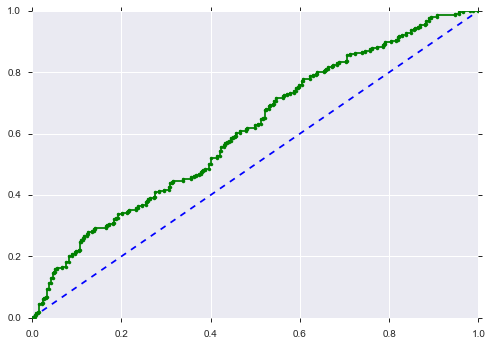

In [34]:
probs = model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.645


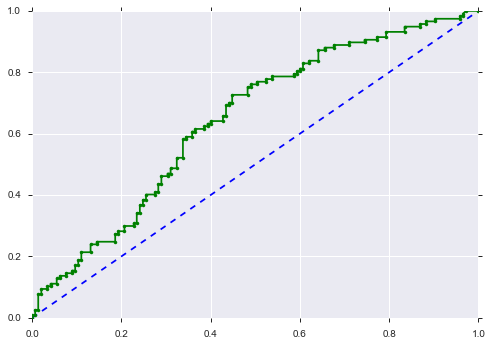

In [35]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.612


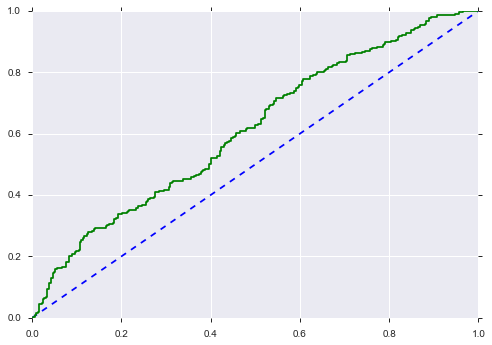

In [36]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr)

AUC: 0.645


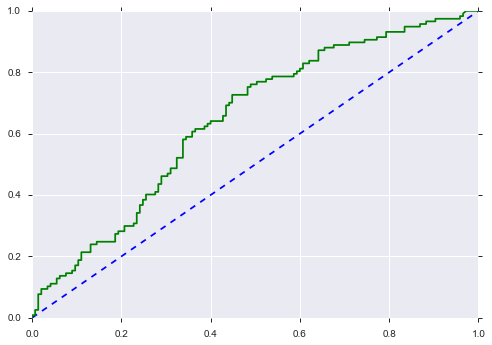

In [37]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % LDA_test_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr)

In [38]:
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
LDA_train_acc=model.score(X_train,y_train) 
print(LDA_train_acc)
print(classification_report(y_train, ytrain_predict))
LDA_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_precision=round(df.loc["1.0"][1],2)
LDA_train_recall=round(df.loc["1.0"][2],2)
LDA_train_f1=round(df.loc["1.0"][0],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

[[203 123]
 [150 134]]
0.5524590163934426
              precision    recall  f1-score   support

         0.0       0.58      0.62      0.60       326
         1.0       0.52      0.47      0.50       284

    accuracy                           0.55       610
   macro avg       0.55      0.55      0.55       610
weighted avg       0.55      0.55      0.55       610

LDA_train_precision  0.52
LDA_train_recall  0.47
LDA_train_f1  0.5


In [39]:
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
LDA_test_acc=model.score(X_test,y_test)
print(LDA_test_acc)
print(classification_report(y_test, ytest_predict))
LDA_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df.loc["1.0"][1],2)
LDA_test_recall=round(df.loc["1.0"][2],2)
LDA_test_f1=round(df.loc["1.0"][0],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

[[89 56]
 [45 72]]
0.6145038167938931
              precision    recall  f1-score   support

         0.0       0.66      0.61      0.64       145
         1.0       0.56      0.62      0.59       117

    accuracy                           0.61       262
   macro avg       0.61      0.61      0.61       262
weighted avg       0.62      0.61      0.62       262

LDA_test_precision  0.56
LDA_test_recall  0.62
LDA_test_f1  0.59


In [40]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
metdata = pd.DataFrame({'logit Train':[logit_train_acc,logit_train_auc,logit_train_recall,logit_train_precision,logit_train_f1],
        'logit Test':[logit_test_acc,logit_test_auc,logit_test_recall,logit_test_precision,logit_test_f1],
       'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1]
       },index=index)
print(round(metdata,2))
metdata.T.to_csv('D:/GL/Total DS Codes2/Pred Model/Assignment Project/Final Files/Holiday_Package_metdata.csv')

           logit Train  logit Test  LDA Train  LDA Test
Accuracy          0.52        0.56       0.55      0.61
AUC               0.57        0.61       0.61      0.65
Recall            0.08        0.13       0.47      0.62
Precision         0.43        0.54       0.52      0.56
F1 Score          0.14        0.21       0.50      0.59


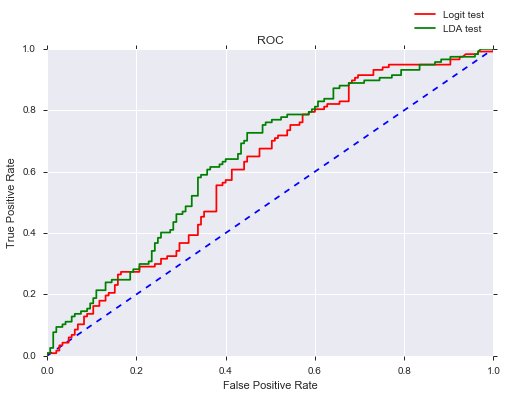

In [41]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_test_fpr, logit_test_tpr,color='red',label="Logit test")
plt.plot(LDA_test_fpr,LDA_test_tpr,color='green',label="LDA test")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

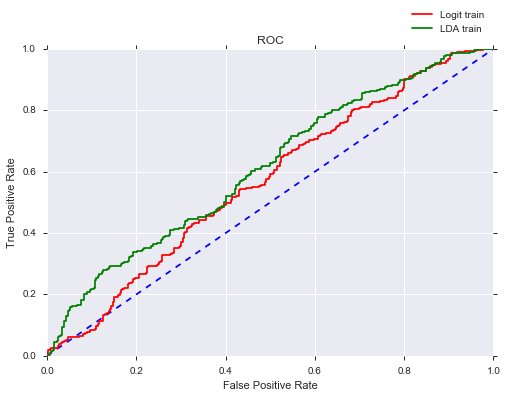

In [42]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_train_fpr, logit_train_tpr,color='red',label="Logit train")
plt.plot(LDA_train_fpr,LDA_train_tpr,color='green',label="LDA train")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
# Copy all the predictor variables into X dataframe
X = data.drop('Holliday_Package', axis=1)
# Copy target into the y dataframe. 
y = data[['Holliday_Package']]
le = LabelEncoder()
yfit = le.fit_transform(data['Holliday_Package'])
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)
print(lda.explained_variance_ratio_)

[1.]


C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[9.99999512e-01 4.51877267e-07]


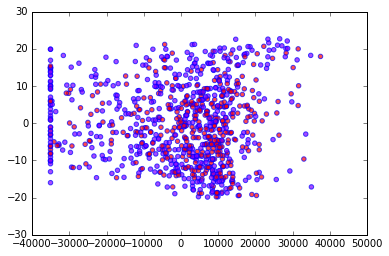

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
print(pca.explained_variance_ratio_)
plt.scatter(X_pca[:,0],
                X_pca[:,1],
                c=yfit,
                cmap='rainbow',
                alpha=0.7,
                edgecolors='b'
                
                )
plt.show()